# k-Nearest Neighbors

O algoritmo k-Nearest Neighbors é um algoritmo não-paramétrico, isto é, não supõe nada a priori da distribuição dos dados.... utilizado tanto para as tarefas de regressão quanto para classificação.

In [2]:
# Processamento dos dados
import numpy  as np
import pandas as pd

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

# Seleção dos modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

# Armazenamento externo de arquivos
from sklearn.externals import joblib

# Métricas de avaliação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

fracao_dataset = 0.1

In [3]:
# Função para exibir e salvar os resultados do classificador final

def exibir_resultados_finais(clf, 
                             test_data, 
                             test_target, 
                             id_abordagem, 
                             str_balanceamento, 
                             path_arquivos,
                             tipo_classificador,
                             fracao_dataset=0.1,
                             salvar_resultados=False):
    
    # Classificando o conjunto de teste

    predicoes = clf.predict(test_data)

    if tipo_classificador == 'arvore':
    
        # Salvando a árvore treinada graficamente

        export_graphviz(clf, 
                        out_file=path_arquivos+tipo_classificador+'-final-abordagem-'+str(id_abordagem)+'-'+str_balanceamento+'-dataset-'+str(int(fracao_dataset*100))+'pct.dot', 
                        feature_names=test_data.columns,  
                        class_names=['Less than or equal to', 'More than'],  
                        filled=True, rounded=True,  
                        special_characters=True)  

    # Avaliando o desempenho

    # Matriz de confusão

    cfs_mtx = confusion_matrix(test_target, predicoes)
    plt.figure(figsize=(20,10))
    sns.set(font_scale=2)
    ax = sns.heatmap(cfs_mtx, 
                     xticklabels=['$\leq50$K', '$>50$K'], 
                     yticklabels=['$\leq50$K', '$>50$K'], 
                     annot=cfs_mtx,
                     fmt='d',
                     cbar=None)

    ax.set_xlabel('Predito', labelpad=20, fontsize=30)
    ax.set_ylabel('Real', labelpad=20, fontsize=30)
    ax.set_title('Matriz de Confusão')
    
    acc = accuracy_score(test_target, predicoes)
    pre = precision_score(test_target, predicoes)
    rec = recall_score(test_target, predicoes)
    f1 = f1_score(test_target, predicoes)
    
    if tipo_classificador in ['svm-rbf','svm-linear']:
        predicoes = clf.decision_function(test_data)
    elif tipo_classificador in ['arvore','naive-bayes','logit','knn','rf']:
        predicoes = clf.predict_proba(test_data)[:,1]
    
    roc_auc = roc_auc_score(test_target, predicoes)
    prc_auc = average_precision_score(test_target, predicoes)

    print('Acurácia: %.3f %%' % (acc*100))
    print('Precisão: %.3f %%' % (pre*100))
    print('Recall: %.3f %%' % (rec*100))
    print('F1 score: %3f %%' % (f1*100))
    print('ROC AUC: %.3f %%' % (roc_auc*100))
    print('PRC AUC: %.3f %%' % (prc_auc*100))

    # plot_confusion_matrix(cfs_mtx, ['<=50K', '>50K'], normalize=False)
    
    if salvar_resultados:
        if tipo_classificador == 'arvore':
            path_graficos = 'Classificadores/Arvores-decisao/'
        elif tipo_classificador in ['svm-linear', 'svm-rbf']:
            path_graficos = 'Classificadores/SVM/'
        elif tipo_classificador == 'naive-bayes':
            path_graficos = 'Classificadores/Naive-bayes/'
        elif tipo_classificador == 'logit':
            path_graficos = 'Classificadores/Regressao-logistica/'
        elif tipo_classificador == 'knn':
            path_graficos = 'Classificadores/kNN/'
        elif tipo_classificador == 'rf':
            path_graficos = 'Classificadores/Random-forest/'
        elif tipo_classificador == 'mlp':
            path_graficos = 'Classificadores/Redes-neurais-MLP-2/'
        
        joblib.dump(predicoes,
                    path_arquivos+tipo_classificador+'-final-abordagem-'+str(id_abordagem)+'-'+str_balanceamento+'-predicoes.pkl')    
        
        filename = path_graficos+tipo_classificador+'-final-abordagem-'+str(id_abordagem)+'-'+str_balanceamento+'-matriz-confusao.png'
        plt.savefig(filename)
        
        d = {'Acuracia': acc, 
             'Precisao': pre, 
             'Recall': rec, 
             'F1': f1,
             'ROC AUC': roc_auc, 
             'PRC AUC': prc_auc}
        
        temp = pd.Series(data=d).to_csv(path=path_arquivos+tipo_classificador+'-final-abordagem-'+str(id_abordagem)+'-'+str_balanceamento+'-medidas.csv', sep=',')
        
        
    plt.show()

## Carregamento dos datasets balanceados

In [4]:
# Conjuntos de treinamento
# Conjunto 1
conjunto1_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_1.csv')
conjunto1_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_1.csv')

# Conjunto 2
conjunto2_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_2.csv')
conjunto2_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_2.csv')

# Conjunto 3
conjunto3_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_3.csv')
conjunto3_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_3.csv')

# Conjunto 4
conjunto4_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_4.csv')
conjunto4_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_4.csv')

In [5]:
# Conjuntos de teste
# Conjunto 1
conjunto1_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_1.csv')
conjunto1_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_1.csv')

# Conjunto 2
conjunto2_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_2.csv')
conjunto2_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_2.csv')

# Conjunto 3
conjunto3_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_3.csv')
conjunto3_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_3.csv')

# Conjunto 4
conjunto4_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_4.csv')
conjunto4_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_4.csv')

## Carregamento dos datasets desbalanceados

In [6]:
# Leitura dos Datasets desbalanceados

# Conjuntos de treinamento

# Conjunto 1
conjunto1_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_1.csv')
conjunto1_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_1.csv')

# Conjunto 2
conjunto2_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_2.csv')
conjunto2_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_2.csv')

# Conjunto 3
conjunto3_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_3.csv')
conjunto3_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_3.csv')

# Conjunto 4
conjunto4_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_4.csv')
conjunto4_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_4.csv')

In [7]:
# Conjuntos de teste
# Conjunto 1
conjunto1_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_1.csv')
conjunto1_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_1.csv')

# Conjunto 2
conjunto2_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_2.csv')
conjunto2_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_2.csv')

# Conjunto 3
conjunto3_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_3.csv')
conjunto3_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_3.csv')

# Conjunto 4
conjunto4_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_4.csv')
conjunto4_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_4.csv')

## Pré-processamento dos dados

### Remoção de colunas inúteis

In [8]:
# Lista de csvs
df_data_balanceado        = [conjunto1_train, conjunto2_train ,conjunto3_train ,conjunto4_train,
                               conjunto1_test, conjunto2_test  ,conjunto3_test  ,conjunto4_test]

df_target_balanceado      = [conjunto1_train_target, conjunto2_train_target, conjunto3_train_target, conjunto4_train_target,
                              conjunto1_test_target, conjunto2_test_target , conjunto3_test_target , conjunto4_test_target]

df_data_desbalanceado     = [conjunto1_train_desbalanceado, conjunto2_train_desbalanceado, conjunto3_train_desbalanceado, conjunto4_train_desbalanceado,
                              conjunto1_test_desbalanceado,  conjunto2_test_desbalanceado,  conjunto3_test_desbalanceado, conjunto4_test_desbalanceado]

df_target_desbalanceado   = [conjunto1_train_target_desbalanceado, conjunto2_train_target_desbalanceado, conjunto3_train_target_desbalanceado, conjunto4_train_target_desbalanceado,
                              conjunto1_test_target_desbalanceado,  conjunto2_test_target_desbalanceado,  conjunto3_test_target_desbalanceado, conjunto4_test_target_desbalanceado]

In [9]:
# Remoção das colunas ids
for df_index in range(0,8):
    # Dataset balanceado
    df_data_balanceado[df_index].drop('id',axis=1,inplace=True)
    df_target_balanceado[df_index].drop('id',axis=1,inplace=True)
    
    # Dataset desbalanceado
    df_data_desbalanceado[df_index].drop('id',axis=1,inplace=True)
    df_target_desbalanceado[df_index].drop('id',axis=1,inplace=True)

In [10]:
# Transformação das features categóricas em dummy variables, utilizando get_dummies

def get_dummies_features(df):
    ''' Função utilizada para a codificação de features categóricas de um dataframe em features binárias'''
    output = pd.DataFrame(index = df.index)

    # Verifica cada feature, transformando somente as features categóricas/object
    for col, col_data in df.iteritems():

        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        output = output.join(col_data)
    
    return output

In [11]:
# Convertendo as features presentes no dataframes em dummies :

# Datasets balanceados
# Conjunto de treinamento
conjunto1_train = get_dummies_features(conjunto1_train)
conjunto2_train = get_dummies_features(conjunto2_train)
conjunto3_train = get_dummies_features(conjunto3_train)
conjunto4_train = get_dummies_features(conjunto4_train)

# Conjunto de teste
conjunto1_test = get_dummies_features(conjunto1_test)
conjunto2_test = get_dummies_features(conjunto2_test) 
conjunto3_test = get_dummies_features(conjunto3_test)
conjunto4_test = get_dummies_features(conjunto4_test)

# Datasets desbalanceados
conjunto1_train_desbalanceado = get_dummies_features(conjunto1_train_desbalanceado)
conjunto2_train_desbalanceado = get_dummies_features(conjunto2_train_desbalanceado)
conjunto3_train_desbalanceado = get_dummies_features(conjunto3_train_desbalanceado)
conjunto4_train_desbalanceado = get_dummies_features(conjunto4_train_desbalanceado)

# Conjunto de teste
conjunto1_test_desbalanceado = get_dummies_features(conjunto1_test_desbalanceado)
conjunto2_test_desbalanceado = get_dummies_features(conjunto2_test_desbalanceado) 
conjunto3_test_desbalanceado = get_dummies_features(conjunto3_test_desbalanceado)
conjunto4_test_desbalanceado = get_dummies_features(conjunto4_test_desbalanceado)

## Treinamento

- 4 Cenários são testados:
    - Dataset 1 - sem dados faltantes, com a presença de outliers
    - Dataset 2 - imputação de dados faltantes de acordo com a moda, com a presença de outliers
    - Dataset 3 - imputação de dados faltantes de acordo com a moda, sem a presença de outliers
    - Dataset 4 - sem dados faltantes, sem a presença de outliers
 
 
- Métrica utilizada para os datasets balanceados: acurácia
- Métrica utilizada para os datasets desbalanceados: F-Score e ROC AUC

<div align="center">
No algoritmo k-NN, temos como hiperparâmetro a quantidade k de vizinhos próximos que serão utilizados para a classificação das instâncias do dataset. Primeiramente, devemos realizar uma busca pelo melhor parâmetro, e após esse processo, realizar o treinamento do modelo para o valor k ótimo. Abaixo, os 4 cenários são verificados.
</div>

In [12]:
# importanto o classificador
from sklearn.neighbors import KNeighborsClassifier as KNN
clf_knn = KNN()

### Cenários para os datasets balanceados

In [16]:
# Teste base: Verificando o funcionamento correto do modelo para as configurações padrões: K = 5
clf_knn.fit(conjunto1_train,conjunto1_train_target.earnings)
prediction_conjunto1 = clf_knn.predict(conjunto1_test)
print('Acurácia para o conjunto 1: {:.2f}'.format(accuracy_score(conjunto1_test_target.earnings,prediction_conjunto1,normalize=True)))

clf_knn.fit(conjunto2_train,conjunto2_train_target.earnings)
prediction_conjunto2 = clf_knn.predict(conjunto2_test)
print('Acurácia para o conjunto 2: {:.2f}'.format(accuracy_score(conjunto2_test_target.earnings,prediction_conjunto2,normalize=True)))

clf_knn.fit(conjunto3_train,conjunto3_train_target.earnings)
prediction_conjunto3 = clf_knn.predict(conjunto3_test)
print('Acurácia para o conjunto 3: {:.2f}'.format(accuracy_score(conjunto3_test_target.earnings,prediction_conjunto3,normalize=True)))

clf_knn.fit(conjunto4_train,conjunto4_train_target.earnings)
prediction_conjunto4 = clf_knn.predict(conjunto4_test)
print('Acurácia para o conjunto 4: {:.2f}'.format(accuracy_score(conjunto4_test_target.earnings,prediction_conjunto4,normalize=True)))

Acurácia para o conjunto 1: 0.80
Acurácia para o conjunto 2: 0.79
Acurácia para o conjunto 3: 0.80
Acurácia para o conjunto 4: 0.79


Fases de treinamento e teste: O algoritmo k-NN na fase de treinamento apenas armazena em memória o conjunto de treinamento! 

In [13]:
def validation_graph_acc(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    train_scores_mean  = np.mean(scores_treino, axis=1)
    train_scores_std   = np.std (scores_treino, axis=1)
    test_scores_mean   = np.mean(scores_validacao, axis=1)
    test_scores_std    = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('Acurácia para k-vizinhos ',fontsize=20)
    plt.xlabel('Quantidade de k-vizinhos',fontsize=20)
    plt.ylabel('Acurácia',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)
    
    plt.plot(param_range, train_scores_mean, label="Acurácia no treinamento",color="darkorange", lw=lw)
    plt.fill_between(param_range, (train_scores_mean - train_scores_std),(train_scores_mean + train_scores_std), alpha=0.2,color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Acurácia na validação",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.legend(loc="best",fontsize='xx-large')
    plt.show()

In [14]:
def validation_graph_roc(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    train_scores_mean  = np.mean(scores_treino, axis=1)
    train_scores_std   = np.std (scores_treino, axis=1)
    test_scores_mean   = np.mean(scores_validacao, axis=1)
    test_scores_std    = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('ROC AUC para k-vizinhos ',fontsize=20)
    plt.xlabel('Quantidade de k-vizinhos',fontsize=20)
    plt.ylabel('ROC AUC',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)

    plt.plot(param_range, train_scores_mean, label="Acurácia no treinamento",color="darkorange", lw=lw)
    plt.fill_between(param_range, (train_scores_mean - train_scores_std),(train_scores_mean + train_scores_std), alpha=0.2,color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Acurácia na validação",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.legend(loc="best",fontsize='xx-large')
    plt.show()

In [15]:
def validation_graph_f1(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    train_scores_mean  = np.mean(scores_treino, axis=1)
    train_scores_std   = np.std (scores_treino, axis=1)
    test_scores_mean   = np.mean(scores_validacao, axis=1)
    test_scores_std    = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('F1-score para k-vizinhos ',fontsize=20)
    plt.xlabel('Quantidade de k-vizinhos',fontsize=20)
    plt.ylabel('F1-score',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)

    plt.plot(param_range, train_scores_mean, label="Acurácia no treinamento",color="darkorange", lw=lw)
    plt.fill_between(param_range, (train_scores_mean - train_scores_std),(train_scores_mean + train_scores_std), alpha=0.2,color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Acurácia na validação",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.legend(loc="best",fontsize='xx-large')
    plt.show()

### Dataset 1

O dataset 1 balanceado possui a seguinte característica: Não possui instâncias com valores faltantes e possui outliers.

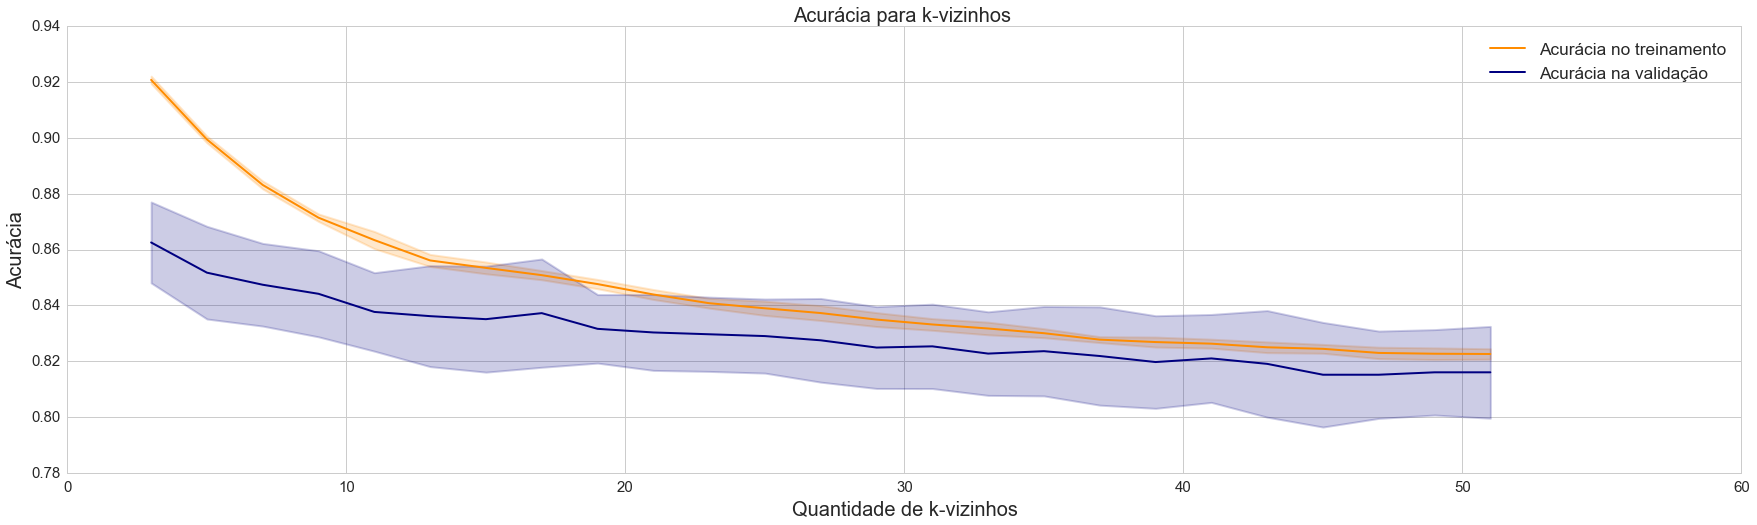

In [109]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=KNN(),X=conjunto1_train,y=conjunto1_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='accuracy',jobs=-1)

##### Escolha de hiperparâmetro: k = 3

In [110]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_acc_1 = cross_val_score(KNN(n_neighbors=3),conjunto1_train,conjunto1_train_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_acc_1)
print('Média da cv: {}'.format(np.mean(cross_val_bal_1)))

[ 0.84848485  0.84199134  0.88311688  0.85064935  0.87662338  0.87229437
  0.86796537  0.85497835  0.88095238  0.84848485]
Média da cv: 0.8625541125541124


In [111]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto1_train,conjunto1_train_target.earnings)

prediction_balanceado    = clf_knn.predict(conjunto1_test)
prediction_desbalanceado = clf_knn.predict(conjunto1_test_desbalanceado)

print('Acurácia para o conjunto 1: {:.2f}'.format(accuracy_score(conjunto1_test_target.earnings,prediction_balanceado,normalize=True)))
print('Acurácia para o conjunto 1: {:.2f}'.format(accuracy_score(conjunto1_test_target_desbalanceado.earnings,prediction_desbalanceado,normalize=True)))

Acurácia para o conjunto 1: 0.79
Acurácia para o conjunto 1: 0.79


#### F1-Score

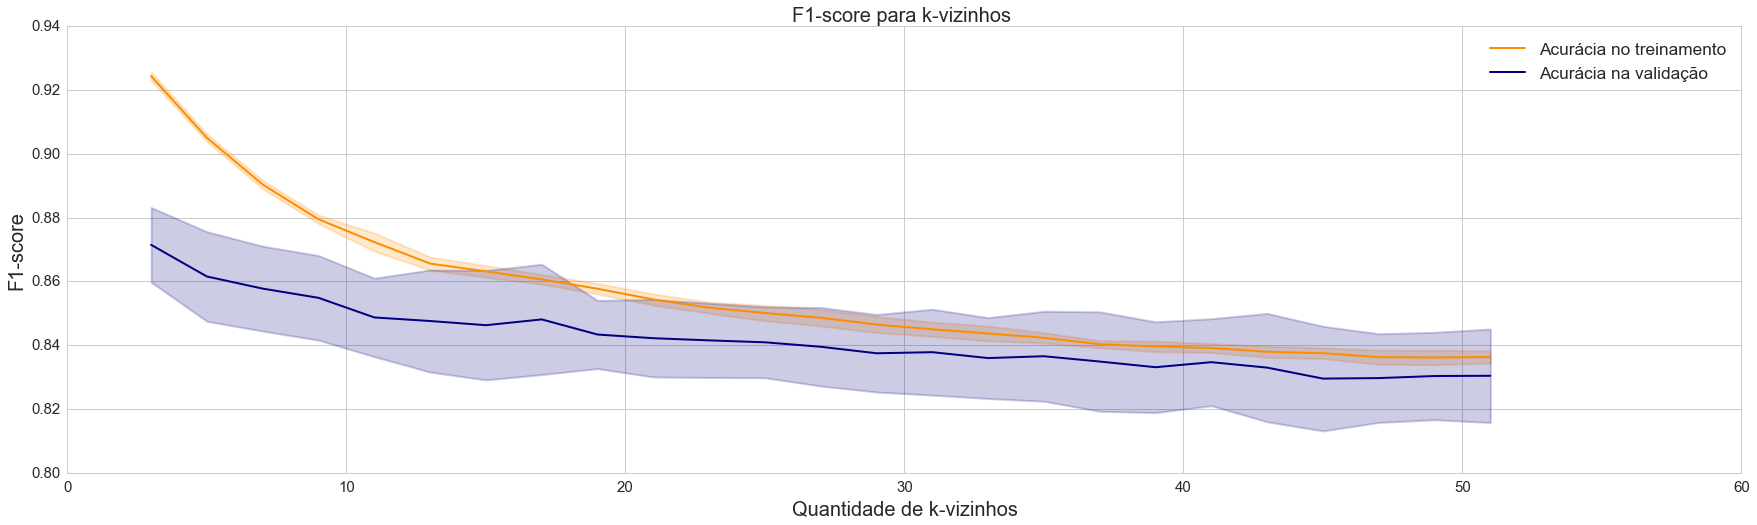

In [112]:
validation_graph_f1(model=KNN(),X=conjunto1_train,y=conjunto1_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

##### Escolha de hiperparâmetro: k = 3

In [113]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_f1_1 = cross_val_score(KNN(n_neighbors=3),conjunto1_train,conjunto1_train_target.earnings,cv=10,scoring='f1')
print(cross_val_bal_f1_1)
print('Média da cv: {}'.format(np.mean(cross_val_bal_f1_1)))

[ 0.85655738  0.85714286  0.8879668   0.86172345  0.88391039  0.87835052
  0.87626775  0.86519115  0.88612836  0.86166008]
Média da cv: 0.871489872729498


In [114]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto1_train,conjunto1_train_target.earnings)

prediction_balanceado    = clf_knn.predict(conjunto1_test)
prediction_desbalanceado = clf_knn.predict(conjunto1_test_desbalanceado)

print('Acurácia para o conjunto 1: {:.2f}'.format(f1_score(conjunto1_test_target.earnings,prediction_balanceado)))
print('Acurácia para o conjunto 1: {:.2f}'.format(f1_score(conjunto1_test_target_desbalanceado.earnings,prediction_desbalanceado)))

Acurácia para o conjunto 1: 0.79
Acurácia para o conjunto 1: 0.62


#### ROC AUC

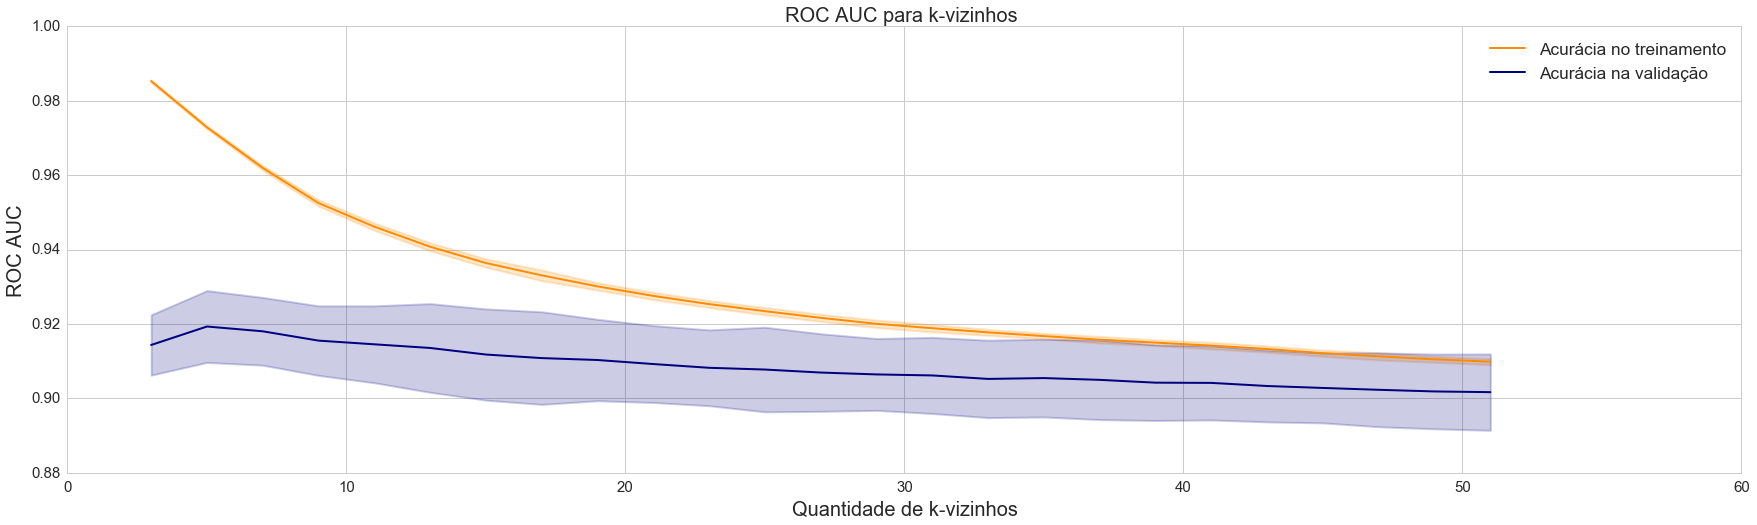

In [115]:
validation_graph_roc(model=KNN(),X=conjunto1_train,y=conjunto1_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [116]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_roc_1 = cross_val_score(KNN(n_neighbors=3),conjunto1_train,conjunto1_train_target.earnings,cv=10,scoring='roc_auc')
print(cross_val_bal_roc_1)
print('Média da cv: {}'.format(np.mean(cross_val_bal_roc_1)))

[ 0.91127415  0.89473586  0.91974476  0.91493788  0.92356777  0.92495455
  0.91690561  0.91357921  0.91491914  0.90899721]
Média da cv: 0.9143616124135605


In [117]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto1_train,conjunto1_train_target.earnings)

prediction_balanceado    = clf_knn.predict(conjunto1_test)
prediction_desbalanceado = clf_knn.predict(conjunto1_test_desbalanceado)

print('ROC AUC para o conjunto 1: {:.2f}'.format(roc_auc_score(conjunto1_test_target.earnings,prediction_balanceado)))
print('ROC AUC para o conjunto 1: {:.2f}'.format(roc_auc_score(conjunto1_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 1: 0.79
ROC AUC para o conjunto 1: 0.77


### Dataset 2

O dataset 2 possui a seguinte característica: Dados faltantes imputados pela moda e presença de outliers.

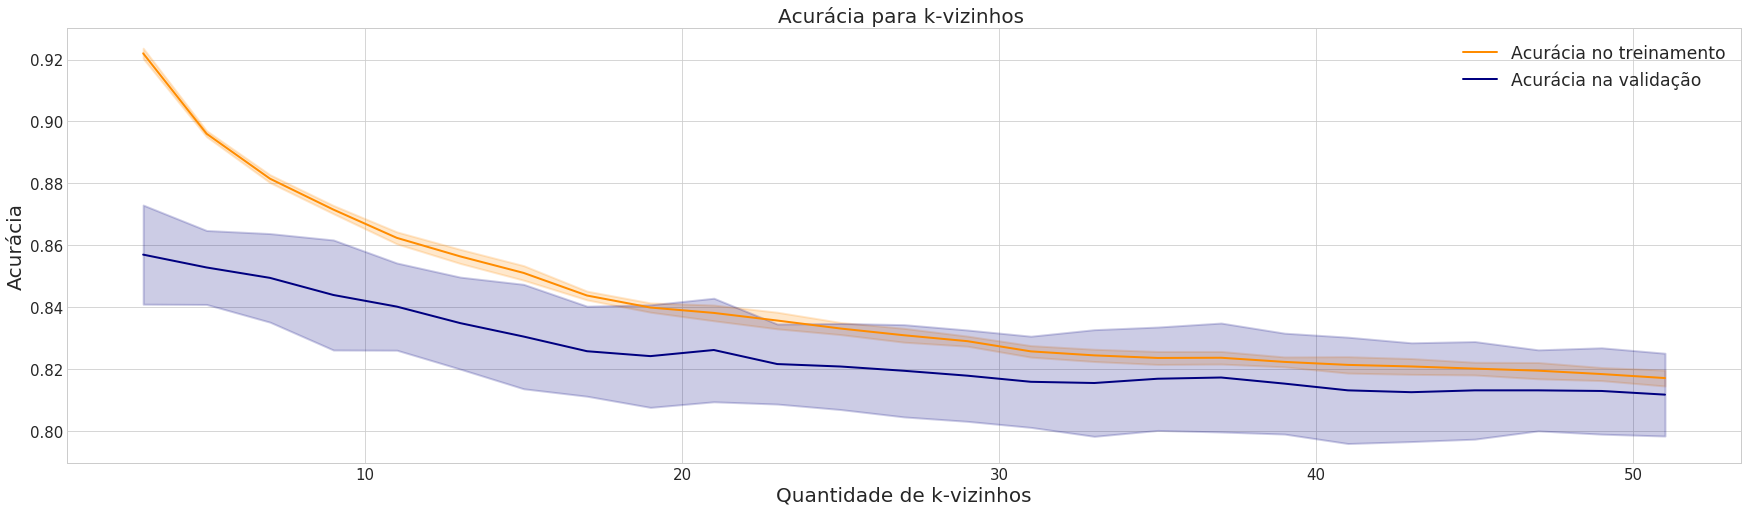

In [14]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=KNN(),X=conjunto2_train,y=conjunto2_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='accuracy',jobs=-1)

#### Acurácia

##### Escolha de hiperparâmetro: k = 3

In [16]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_acc_2 = cross_val_score(KNN(n_neighbors=3),conjunto2_train,conjunto2_train_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_acc_2)
print('Média da cv (acurácia): {}'.format(np.mean(cross_val_bal_acc_2)))

[0.8503937  0.84189723 0.86758893 0.85177866 0.84189723 0.83992095
 0.84782609 0.86956522 0.89328063 0.86561265]
Média da cv (acurácia): 0.8569761289720208


In [18]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto2_train,conjunto2_train_target.earnings)

prediction_balanceado    = clf_knn.predict(conjunto2_test)
prediction_desbalanceado = clf_knn.predict(conjunto2_test_desbalanceado)

print('Acurácia para o conjunto 2: {:.2f}'.format(accuracy_score(conjunto2_test_target.earnings,prediction_balanceado,normalize=True)))
print('Acurácia para o conjunto 2: {:.2f}'.format(accuracy_score(conjunto2_test_target_desbalanceado.earnings,prediction_desbalanceado,normalize=True)))

Acurácia para o conjunto 2: 0.77
Acurácia para o conjunto 2: 0.78


#### F1-Score

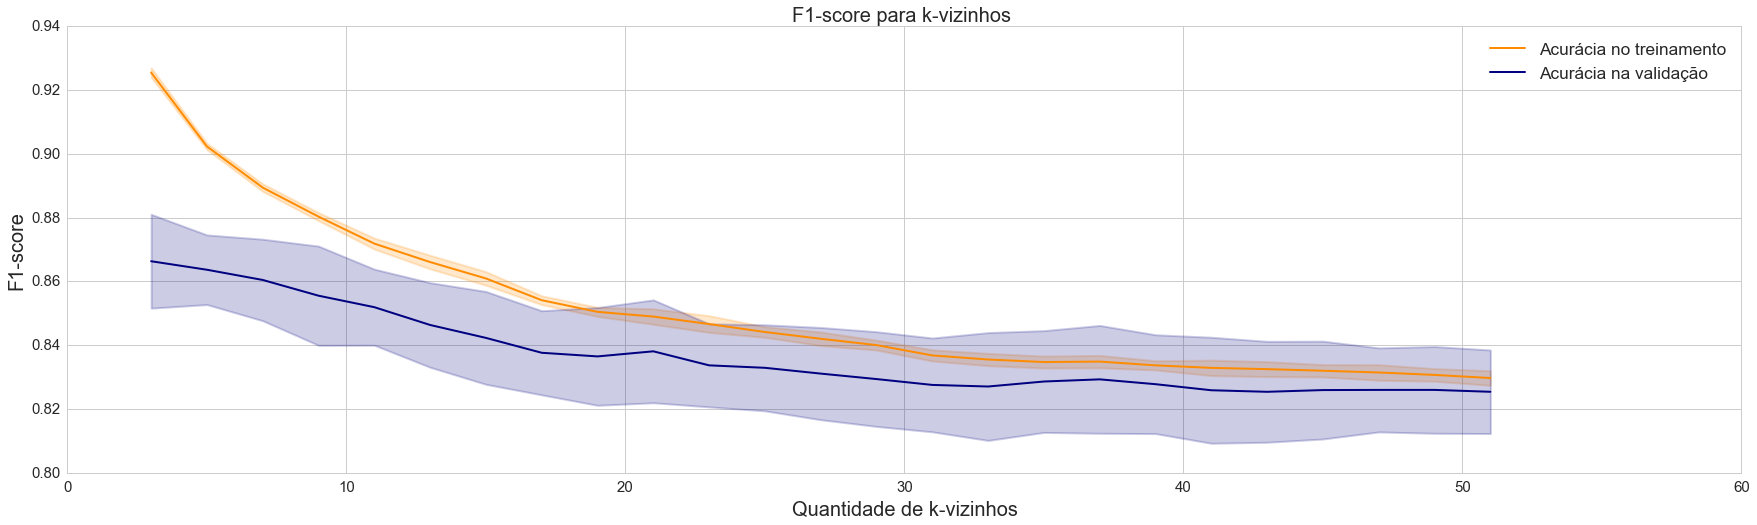

In [121]:
validation_graph_f1(model=KNN(),X=conjunto2_train,y=conjunto2_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

In [19]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_f1_2 = cross_val_score(KNN(n_neighbors=3),conjunto2_train,conjunto2_train_target.earnings,cv=10,scoring='f1')
print(cross_val_bal_f1_2)
print('Média da cv (F1): {}'.format(np.mean(cross_val_bal_f1_2)))

[0.86131387 0.8540146  0.87569573 0.86136784 0.8540146  0.84916201
 0.85607477 0.87777778 0.9        0.87407407]
Média da cv (F1): 0.8663495265250459


In [21]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto2_train,conjunto2_train_target.earnings)

prediction_balanceado    = clf_knn.predict(conjunto2_test)
prediction_desbalanceado = clf_knn.predict(conjunto2_test_desbalanceado)

print('F1 para o conjunto 2: {:.2f}'.format(f1_score(conjunto2_test_target.earnings,prediction_balanceado)))
print('F1 para o conjunto 2: {:.2f}'.format(f1_score(conjunto2_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1 para o conjunto 2: 0.76
F1 para o conjunto 2: 0.61


#### ROC AUC

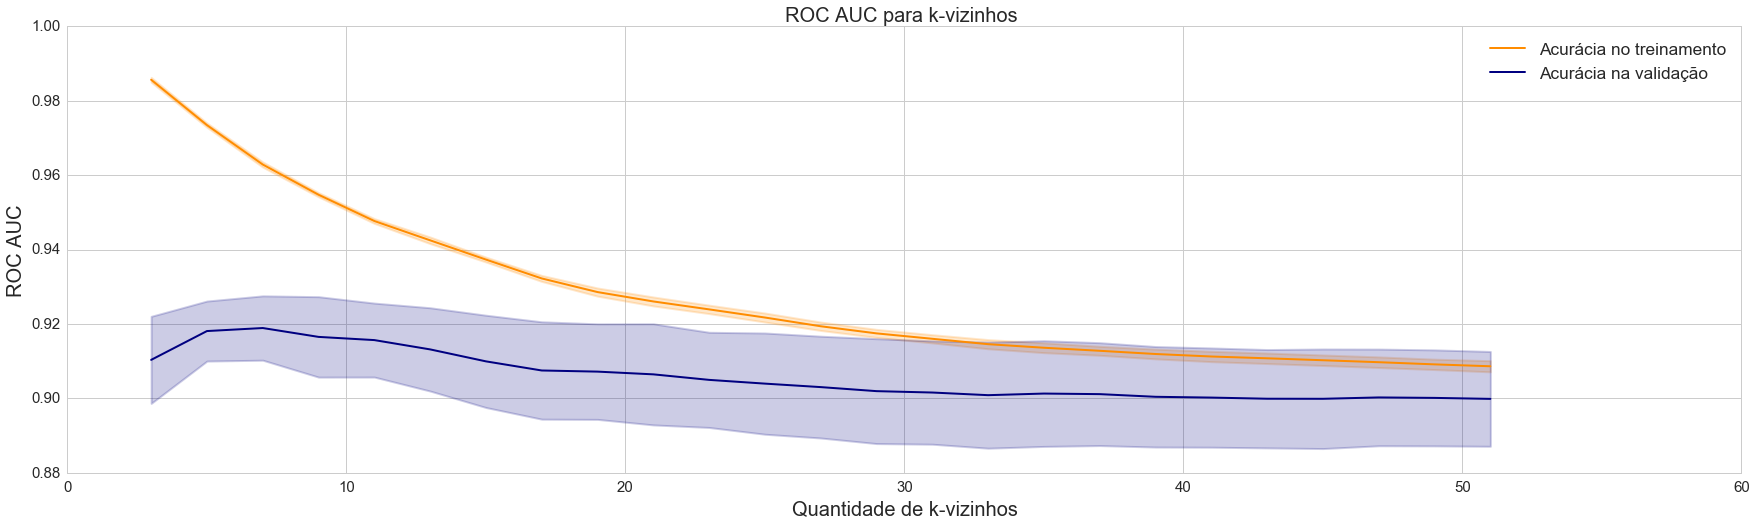

In [124]:
validation_graph_roc(model=KNN(),X=conjunto2_train,y=conjunto2_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [22]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_roc_2 = cross_val_score(KNN(n_neighbors=3),conjunto2_train,conjunto2_train_target.earnings,cv=10,scoring='roc_auc')
print(cross_val_bal_roc_2)
print('Média da cv (ROC AUC): {}'.format(np.mean(cross_val_bal_roc_2)))

[0.90991382 0.89263229 0.91680857 0.90001406 0.90241216 0.89988127
 0.91304348 0.91334031 0.93522786 0.92028465]
Média da cv (ROC AUC): 0.9103558463549616


In [23]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_roc_2 = cross_val_score(KNN(n_neighbors=5),conjunto2_train,conjunto2_train_target.earnings,cv=10,scoring='roc_auc')
print(cross_val_bal_roc_2)
print('Média da cv (ROC AUC): {}'.format(np.mean(cross_val_bal_roc_2)))

[0.91898909 0.90677092 0.92345608 0.91503539 0.92214376 0.90925495
 0.91969879 0.91519161 0.93698542 0.91350435]
Média da cv (ROC AUC): 0.9181030363423817


In [24]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_roc_2 = cross_val_score(KNN(n_neighbors=7),conjunto2_train,conjunto2_train_target.earnings,cv=10,scoring='roc_auc')
print(cross_val_bal_roc_2)
print('Média da cv (ROC AUC): {}'.format(np.mean(cross_val_bal_roc_2)))

[0.91874884 0.90839569 0.91734756 0.92560421 0.92273743 0.90173257
 0.91613679 0.92231561 0.93488416 0.92126888]
Média da cv (ROC AUC): 0.9189171746776058


In [25]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto2_train,conjunto2_train_target.earnings)

prediction_balanceado    = clf_knn.predict_proba(conjunto2_test)
prediction_desbalanceado = clf_knn.predict_proba(conjunto2_test_desbalanceado)

print('ROC AUC para o conjunto 2: {:.2f}'.format(roc_auc_score(conjunto2_test_target.earnings,prediction_balanceado[:,1])))
print('ROC AUC para o conjunto 2: {:.2f}'.format(roc_auc_score(conjunto2_test_target_desbalanceado.earnings,prediction_desbalanceado[:,1])))

ROC AUC para o conjunto 2: 0.83
ROC AUC para o conjunto 2: 0.82


In [26]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=5)
clf_knn.fit(conjunto2_train,conjunto2_train_target.earnings)

prediction_balanceado    = clf_knn.predict_proba(conjunto2_test)
prediction_desbalanceado = clf_knn.predict_proba(conjunto2_test_desbalanceado)

print('ROC AUC para o conjunto 2: {:.2f}'.format(roc_auc_score(conjunto2_test_target.earnings,prediction_balanceado[:,1])))
print('ROC AUC para o conjunto 2: {:.2f}'.format(roc_auc_score(conjunto2_test_target_desbalanceado.earnings,prediction_desbalanceado[:,1])))

ROC AUC para o conjunto 2: 0.85
ROC AUC para o conjunto 2: 0.84


In [33]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=7)
clf_knn.fit(conjunto2_train,conjunto2_train_target.earnings)

prediction_balanceado    = clf_knn.predict_proba(conjunto2_test)
prediction_desbalanceado = clf_knn.predict_proba(conjunto2_test_desbalanceado)

print('ROC AUC para o conjunto 2: {:.2f}'.format(roc_auc_score(conjunto2_test_target.earnings,prediction_balanceado[:,1])))
print('ROC AUC para o conjunto 2: {:.2f}'.format(roc_auc_score(conjunto2_test_target_desbalanceado.earnings,prediction_desbalanceado[:,1])))

ROC AUC para o conjunto 2: 0.86
ROC AUC para o conjunto 2: 0.85


In [73]:
path_arquivos = 'Classificadores/kNN/'

clf_knn = KNN(n_neighbors=7)
clf_knn.fit(conjunto2_train,conjunto2_train_target.earnings)
joblib.dump(clf_knn, 
            path_arquivos+'knn-final-abordagem-2-balanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')

['Classificadores/kNN/knn-final-abordagem-2-balanceado-dataset-10pct.pkl']

Acurácia: 78.598 %
Precisão: 53.846 %
Recall: 77.577 %
F1 score: 63.569166 %
ROC AUC: 85.280 %
PRC AUC: 59.684 %


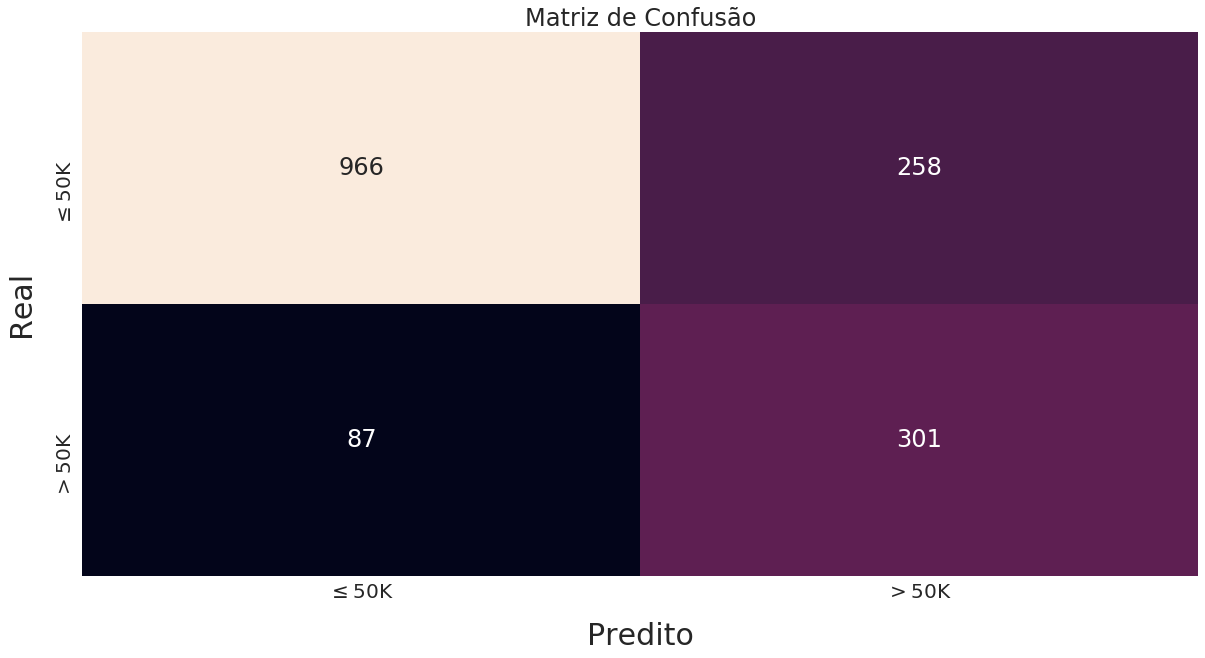

In [28]:
path_arquivos = 'Classificadores/kNN/'

clf_final_balanceado = joblib.load(path_arquivos+'knn-final-abordagem-2-balanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')

exibir_resultados_finais(clf=clf_final_balanceado, 
                         test_data=conjunto2_test_desbalanceado, 
                         test_target=conjunto2_test_target_desbalanceado.earnings, 
                         id_abordagem=2, 
                         str_balanceamento='balanceado', 
                         fracao_dataset=0.1,
                         path_arquivos=path_arquivos,
                         tipo_classificador='knn',
                         salvar_resultados=True)

### Dataset 3

O dataset 3 balanceado possui a seguinte característica: dados faltantes foram removidos e os outliers presentes foram mantidos no dataset.

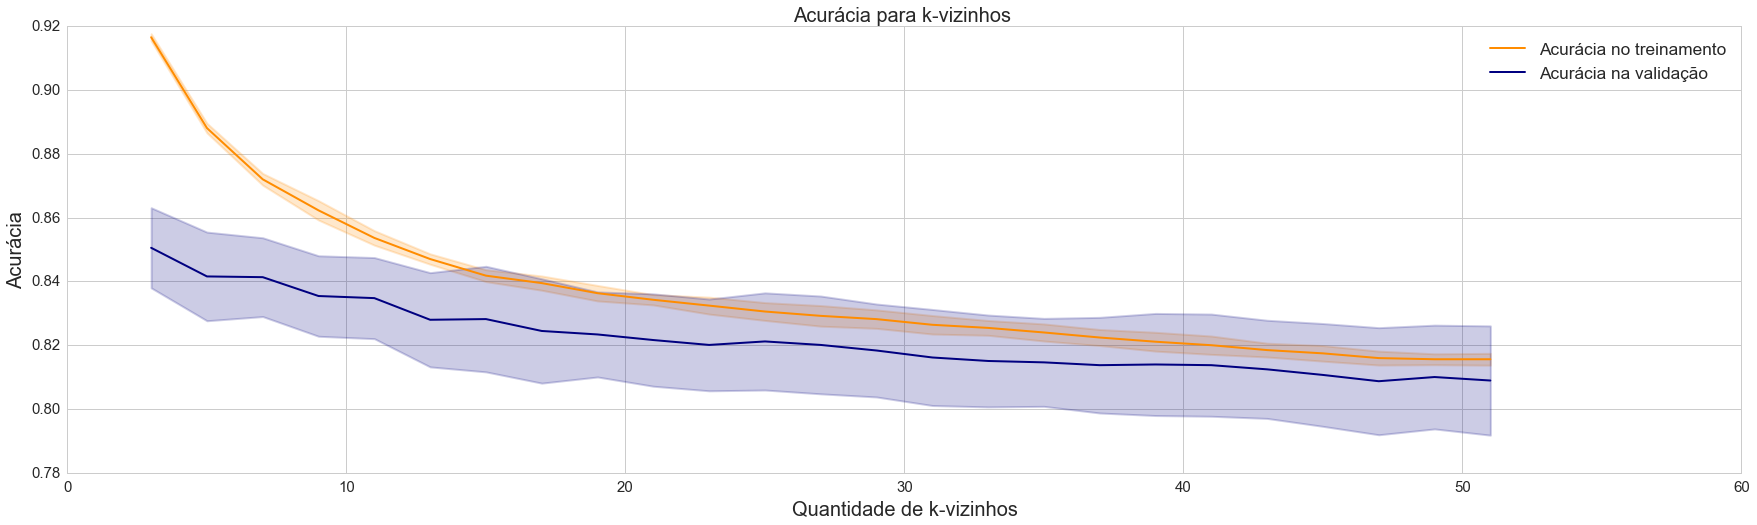

In [131]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=KNN(),X=conjunto3_train,y=conjunto3_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='accuracy',jobs=-1)

#### Acurácia

##### Escolha de hiperparâmetro: k = 3

In [ ]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_acc_3 = cross_val_score(KNN(n_neighbors=3),conjunto3_train,conjunto3_train_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_acc_3)
print('Média da cv: {}'.format(np.mean(cross_val_bal_1)))

In [133]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto3_train,conjunto3_train_target.earnings)

prediction_balanceado    = clf_knn.predict(conjunto3_test)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)

print('Acurácia para o conjunto 3: {:.2f}'.format(accuracy_score(conjunto3_test_target.earnings,prediction_balanceado,normalize=True)))
print('Acurácia para o conjunto 3: {:.2f}'.format(accuracy_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado,normalize=True)))

Acurácia para o conjunto 3: 0.79
Acurácia para o conjunto 3: 0.79


#### F1-Score

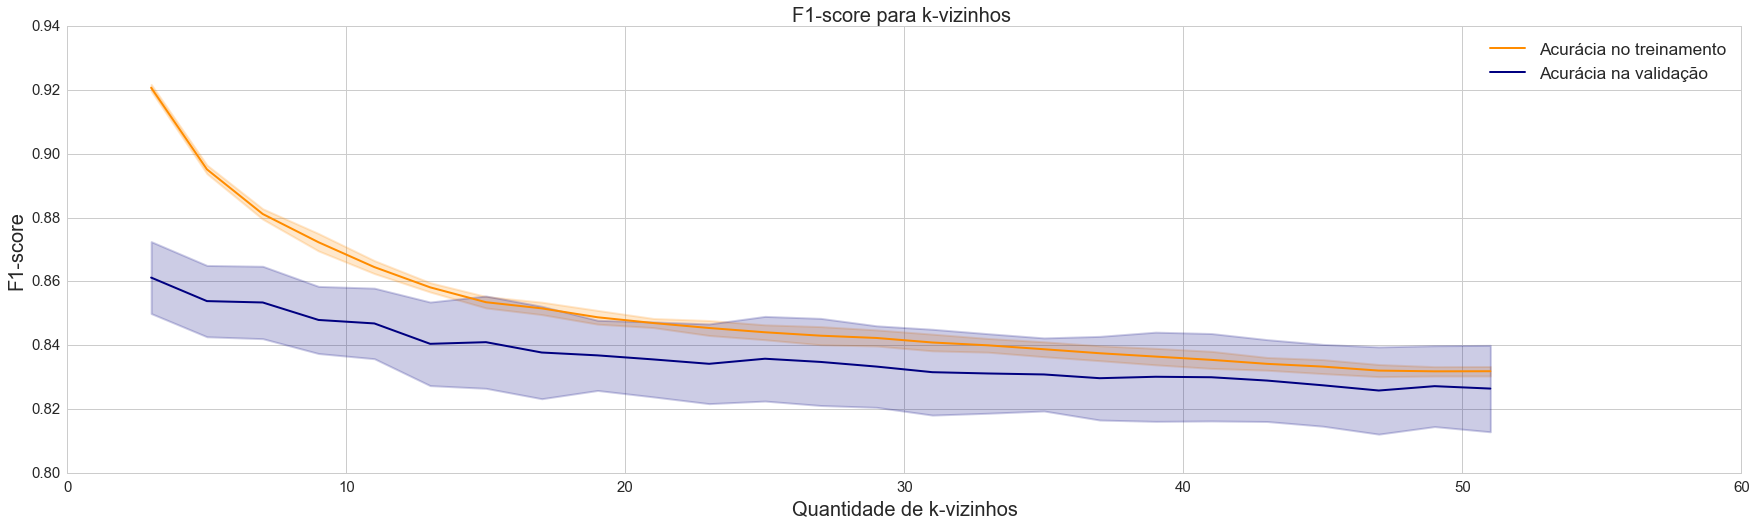

In [134]:
validation_graph_f1(model=KNN(),X=conjunto3_train,y=conjunto3_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

In [135]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_f1_3 = cross_val_score(KNN(n_neighbors=3),conjunto3_train,conjunto3_train_target.earnings,cv=10,scoring='f1')
print(cross_val_bal_f1_3)
print('Média da cv: {}'.format(np.mean(cross_val_bal_f1_3)))

[ 0.87096774  0.86290323  0.84583333  0.85940594  0.85245902  0.87242798
  0.85375494  0.8442623   0.87626775  0.87394958]
Média da cv: 0.861223180570593


In [136]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto3_train,conjunto3_train_target.earnings)

prediction_balanceado    = clf_knn.predict(conjunto3_test)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)

print('F1-Score para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target.earnings,prediction_balanceado)))
print('F1-Score para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 3: 0.80
F1-Score para o conjunto 3: 0.60


#### ROC AUC

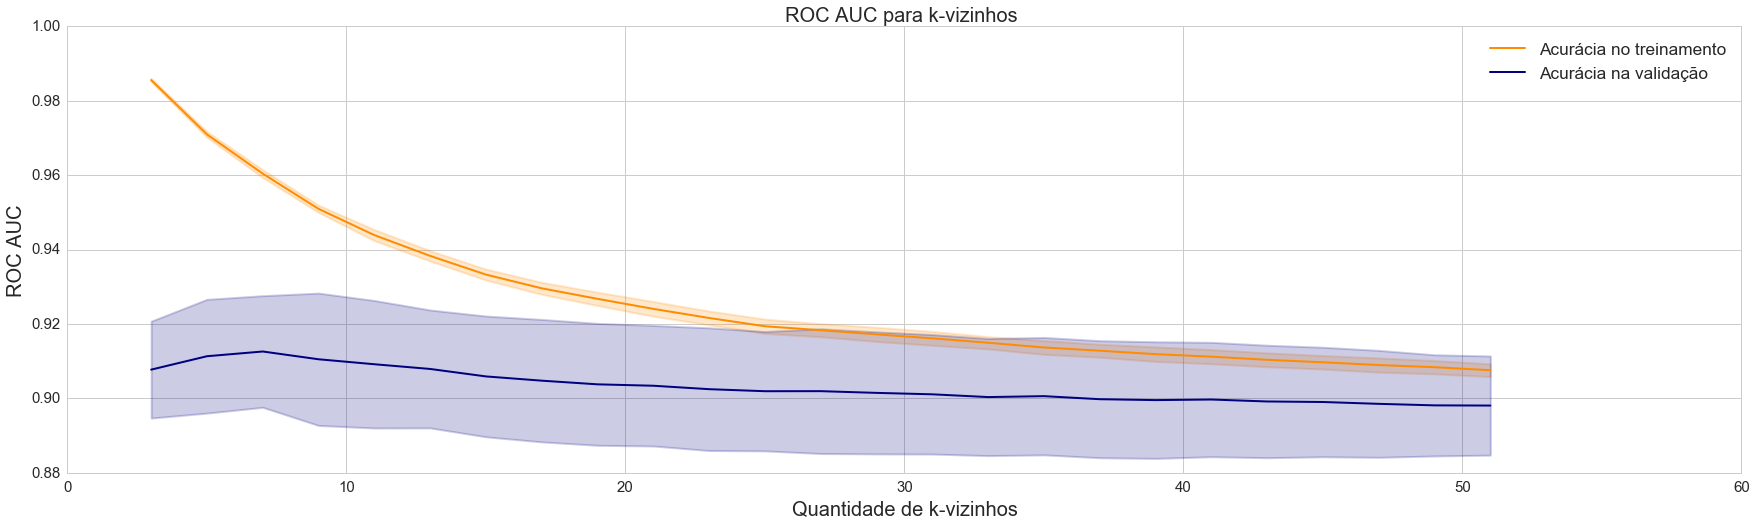

In [137]:
validation_graph_roc(model=KNN(),X=conjunto3_train,y=conjunto3_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [138]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_roc_3 = cross_val_score(KNN(n_neighbors=3),conjunto3_train,conjunto3_train_target.earnings,cv=10,scoring='roc_auc')
print(cross_val_bal_roc_3)
print('Média da cv: {}'.format(np.mean(cross_val_bal_roc_3)))

[ 0.9084781   0.91346466  0.90215259  0.91079948  0.89619883  0.91620499
  0.90645199  0.87773161  0.91774392  0.92809326]
Média da cv: 0.9077319409070007


In [139]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_roc_3 = cross_val_score(KNN(n_neighbors=5),conjunto3_train,conjunto3_train_target.earnings,cv=10,scoring='roc_auc')
print(cross_val_bal_roc_3)
print('Média da cv: {}'.format(np.mean(cross_val_bal_roc_3)))

[ 0.91419881  0.9165157   0.9152143   0.90750038  0.90322984  0.92007156
  0.89438096  0.87924169  0.93105571  0.93195983]
Média da cv: 0.9113368795506483


In [140]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_roc_3 = cross_val_score(KNN(n_neighbors=7),conjunto3_train,conjunto3_train_target.earnings,cv=10,scoring='roc_auc')
print(cross_val_bal_roc_3)
print('Média da cv: {}'.format(np.mean(cross_val_bal_roc_3)))

[ 0.91306421  0.92456284  0.91388697  0.89661242  0.91107841  0.91403124
  0.90088296  0.88432979  0.93161357  0.93601878]
Média da cv: 0.9126081187274442


In [141]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto3_train,conjunto3_train_target.earnings)

prediction_balanceado    = clf_knn.predict(conjunto3_test)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)

print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target.earnings,prediction_balanceado)))
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 3: 0.79
ROC AUC para o conjunto 3: 0.79


### Dataset 4

O dataset 4 balanceado possui a seguinte característica: Os dados faltantes foram removidos, assim como os outliers presentes.

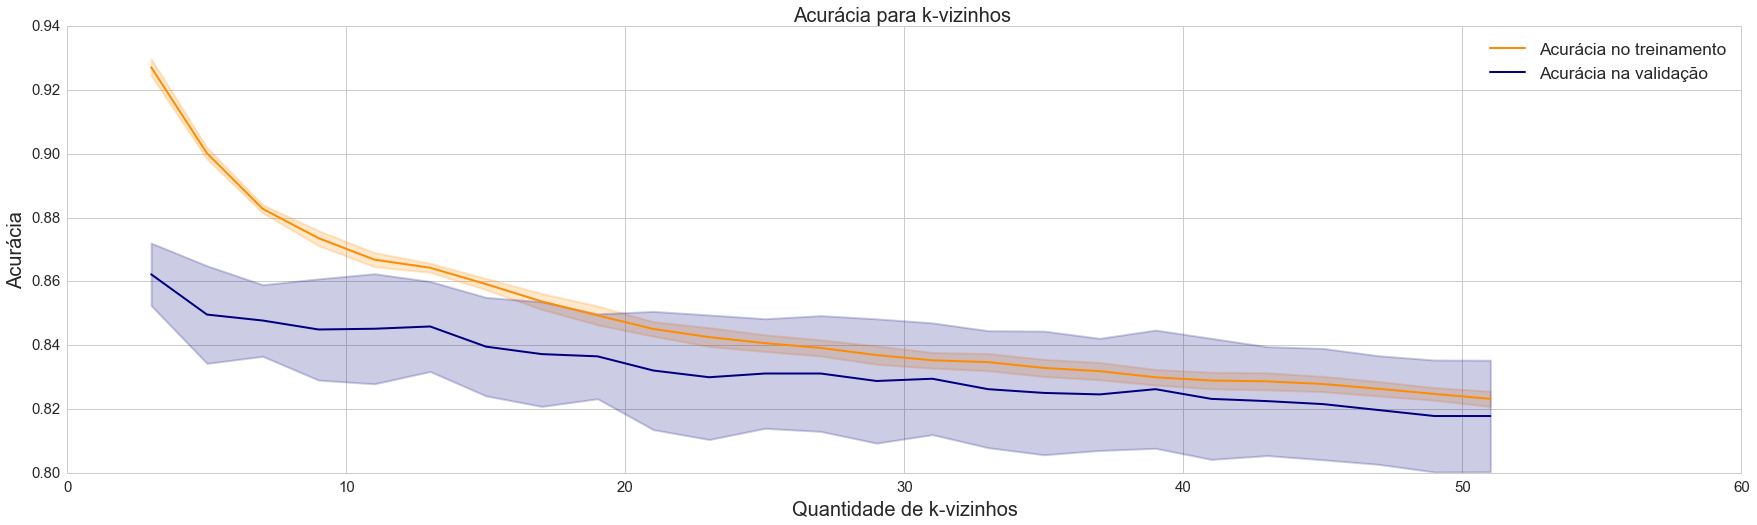

In [142]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=KNN(),X=conjunto4_train,y=conjunto4_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='accuracy',jobs=-1)

#### Acurácia

##### Escolha de hiperparâmetro: k = 3

In [156]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_acc_4 = cross_val_score(KNN(n_neighbors=3),conjunto4_train,conjunto4_train_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_acc_4)
print('Média da cv: {}'.format(np.mean(cross_val_bal_acc_4)))

[ 0.85514019  0.86682243  0.85747664  0.87850467  0.87149533  0.86682243
  0.86214953  0.84345794  0.8685446   0.85211268]
Média da cv: 0.8622526435873809


In [157]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto4_train,conjunto4_train_target.earnings)

prediction_balanceado    = clf_knn.predict(conjunto4_test)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)

print('Acurácia para o conjunto 4: {:.2f}'.format(accuracy_score(conjunto4_test_target.earnings,prediction_balanceado,normalize=True)))
print('Acurácia para o conjunto 4: {:.2f}'.format(accuracy_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado,normalize=True)))

Acurácia para o conjunto 4: 0.78
Acurácia para o conjunto 4: 0.77


#### F1-Score

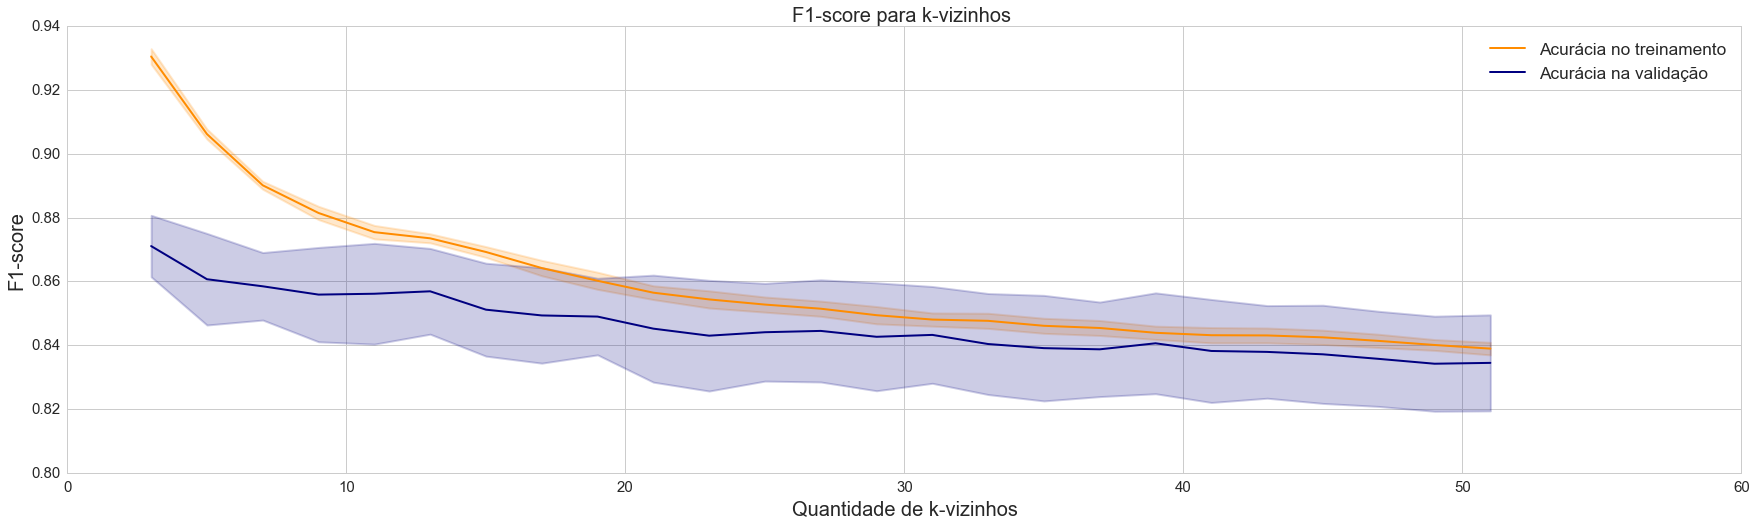

In [145]:
validation_graph_f1(model=KNN(),X=conjunto4_train,y=conjunto4_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

In [150]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_f1_4 = cross_val_score(KNN(n_neighbors=3),conjunto4_train,conjunto4_train_target.earnings,cv=10,scoring='f1')
print(cross_val_bal_f1_4)
print('Média da cv: {}'.format(np.mean(cross_val_bal_f1_4)))

[ 0.86695279  0.87305122  0.86593407  0.88596491  0.87964989  0.87635575
  0.87089716  0.85077951  0.87931034  0.86214442]
Média da cv: 0.871104006216477


In [151]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto4_train,conjunto4_train_target.earnings)

prediction_balanceado    = clf_knn.predict(conjunto4_test_balanceado)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)

print('F1-Score para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target.earnings,prediction_balanceado)))
print('F1-Score para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 4: 0.58


#### ROC AUC

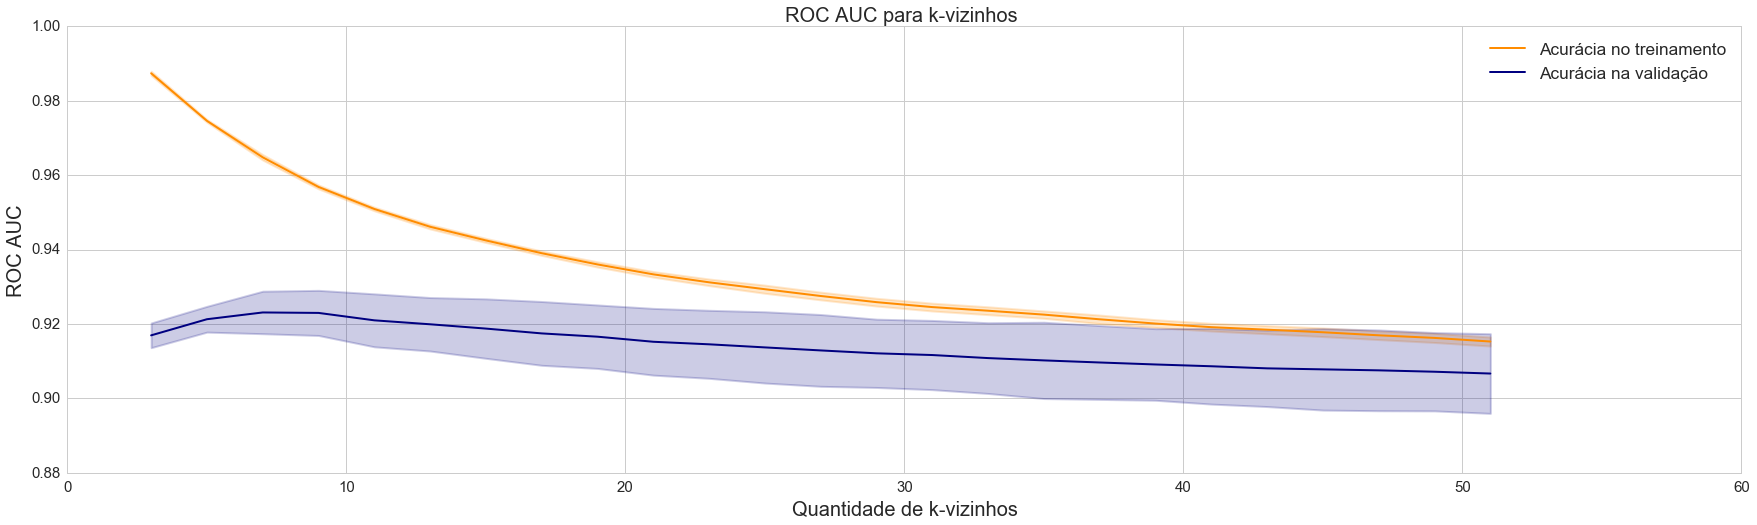

In [154]:
validation_graph_roc(model=KNN(),X=conjunto4_train,y=conjunto4_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [155]:
# K-Fold CV para o hiperparâmetro escolhido:
cross_val_bal_roc_4 = cross_val_score(KNN(n_neighbors=3),conjunto4_train,conjunto4_train_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_roc_4)
print('Média da cv: {}'.format(np.mean(cross_val_bal_roc_4)))

[ 0.85514019  0.86682243  0.85747664  0.87850467  0.87149533  0.86682243
  0.86214953  0.84345794  0.8685446   0.85211268]
Média da cv: 0.8622526435873809


In [158]:
# Desempenho no conjunto de teste - conjunto balanceado
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto4_train,conjunto4_train_target.earnings)

prediction_balanceado    = clf_knn.predict(conjunto4_test)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)

print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target.earnings,prediction_balanceado)))
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 4: 0.78
ROC AUC para o conjunto 4: 0.76


In [159]:
import os
os.system('say "your program has finished"')

0

# FIM balanceado

### Avaliação dos modelos para cada cenário

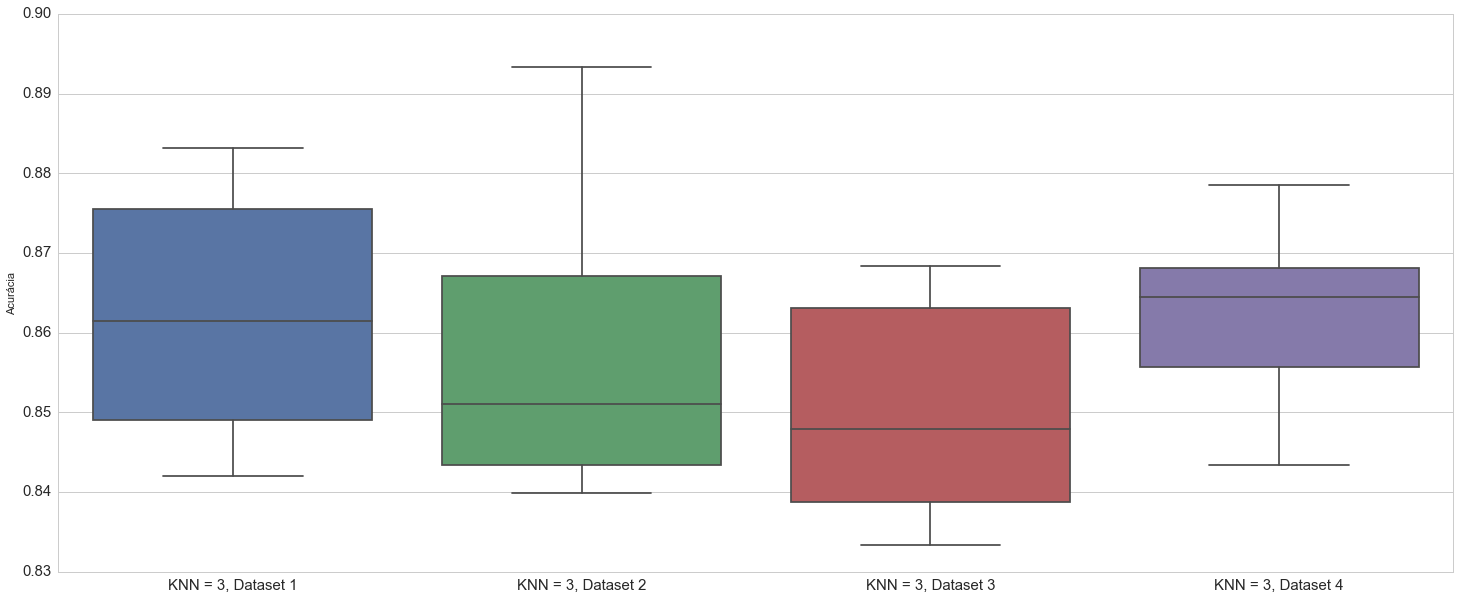

In [52]:
modelos_balanceados = [cross_val_bal_1, cross_val_bal_2, cross_val_bal_3, cross_val_bal_4]
labels = ['KNN = 3, Dataset 1', 'KNN = 3, Dataset 2', 'KNN = 3, Dataset 3', 'KNN = 3, Dataset 4']
plt.figure(figsize=(25,10))
sns.boxplot(data=modelos_balanceados)
plt.xticks(list(range(0,4)),labels,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Acurácia')
plt.show()

### Cenários para os datasets desbalanceado

In [53]:
# Teste base: Verificando o funcionamento correto do modelo para as configurações padrões: K = 5
clf_knn.fit(conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings)
prediction_conjunto1 = clf_knn.predict(conjunto1_test_desbalanceado)
print('F1 para o conjunto 1: {:.2f}'.format(f1_score(conjunto1_test_target_desbalanceado.earnings,prediction_conjunto1)))
print('ROC AUC para o conjunto 1: {:.2f}'.format(roc_auc_score(conjunto1_test_target_desbalanceado.earnings,prediction_conjunto1)))
print()
clf_knn.fit(conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings)
prediction_conjunto2 = clf_knn.predict(conjunto2_test_desbalanceado)
print('F1 para o conjunto 2: {:.2f}'.format(f1_score(conjunto2_test_target_desbalanceado.earnings,prediction_conjunto2)))
print('ROC AUC para o conjunto 2: {:.2f}'.format(roc_auc_score(conjunto2_test_target_desbalanceado.earnings,prediction_conjunto2)))
print()
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_conjunto3 = clf_knn.predict(conjunto3_test_desbalanceado)
print('F1 para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_conjunto3)))
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_conjunto3)))
print()
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_conjunto4 = clf_knn.predict(conjunto4_test_desbalanceado)
print('F1 para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_conjunto4)))
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_conjunto4)))

F1 para o conjunto 1: 0.61
ROC AUC para o conjunto 1: 0.74

F1 para o conjunto 2: 0.55
ROC AUC para o conjunto 2: 0.70

F1 para o conjunto 3: 0.60
ROC AUC para o conjunto 3: 0.75

F1 para o conjunto 4: 0.55
ROC AUC para o conjunto 4: 0.72


Fases de treinamento e teste: O algoritmo k-NN na fase de treinamento apenas armazena em memória o conjunto de treinamento! 

### Dataset 1

O dataset 1 balanceado possui

#### F1-Score

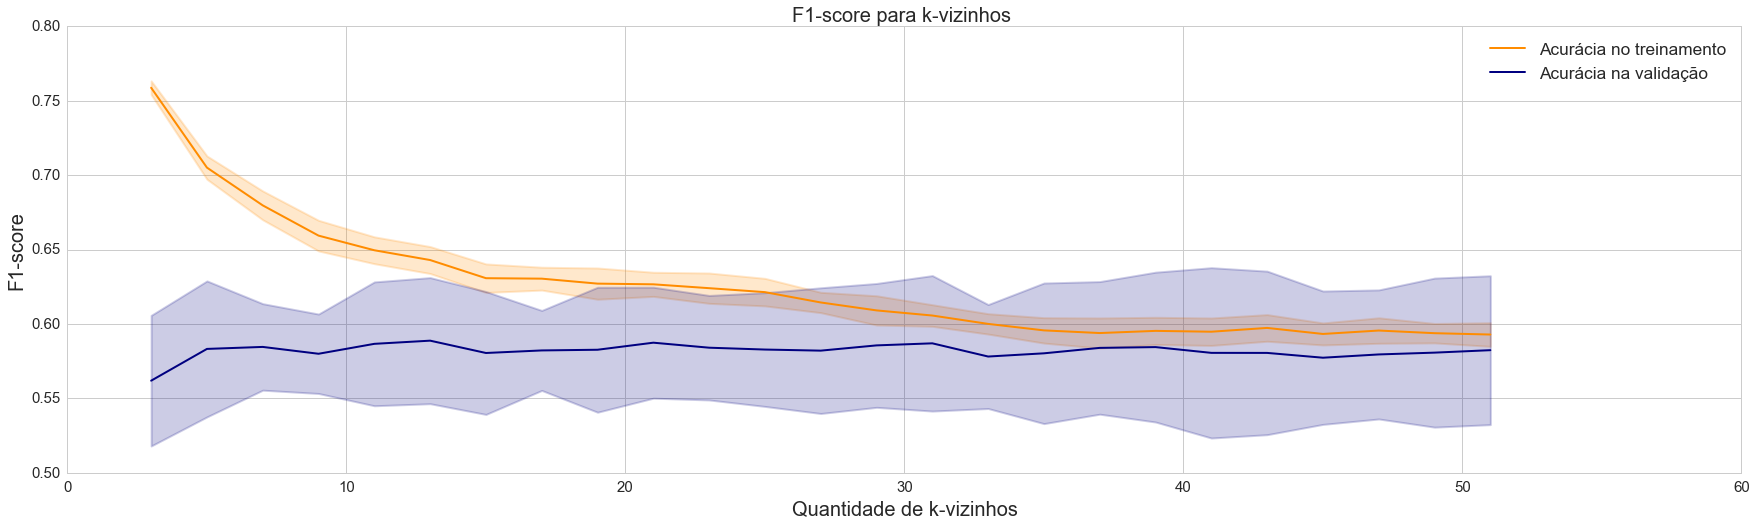

In [160]:
# Busca do melhor hiperparâmetro
validation_graph_f1(model=KNN(),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

In [162]:
cross_val_desbal_f1_1 = cross_val_score(KNN(n_neighbors=3),conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

[ 0.61764706  0.47552448  0.56521739  0.57142857  0.5203252   0.5942029
  0.55384615  0.61313869  0.59259259  0.51515152]
0.561907454661


In [163]:
cross_val_desbal_f1_1 = cross_val_score(KNN(n_neighbors=5),conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

[ 0.59375     0.49275362  0.5648855   0.58646617  0.5203252   0.61870504
  0.60606061  0.64661654  0.63157895  0.57142857]
0.583257019022


In [164]:
cross_val_desbal_f1_1 = cross_val_score(KNN(n_neighbors=7),conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

[ 0.58267717  0.53623188  0.54263566  0.578125    0.57142857  0.60465116
  0.6031746   0.63703704  0.609375    0.58064516]
0.584598124405


In [165]:
cross_val_desbal_f1_1 = cross_val_score(KNN(n_neighbors=9),conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

[ 0.59016393  0.52941176  0.56692913  0.58461538  0.54098361  0.58914729
  0.576       0.61654135  0.61417323  0.592     ]
0.579996569271


In [166]:
clf_knn = KNN(n_neighbors=5)
clf_knn.fit(conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto1_test_desbalanceado)
print('F1-Score para o conjunto 1: {:.2f}'.format(f1_score(conjunto1_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 1: 0.61


#### ROC AUC

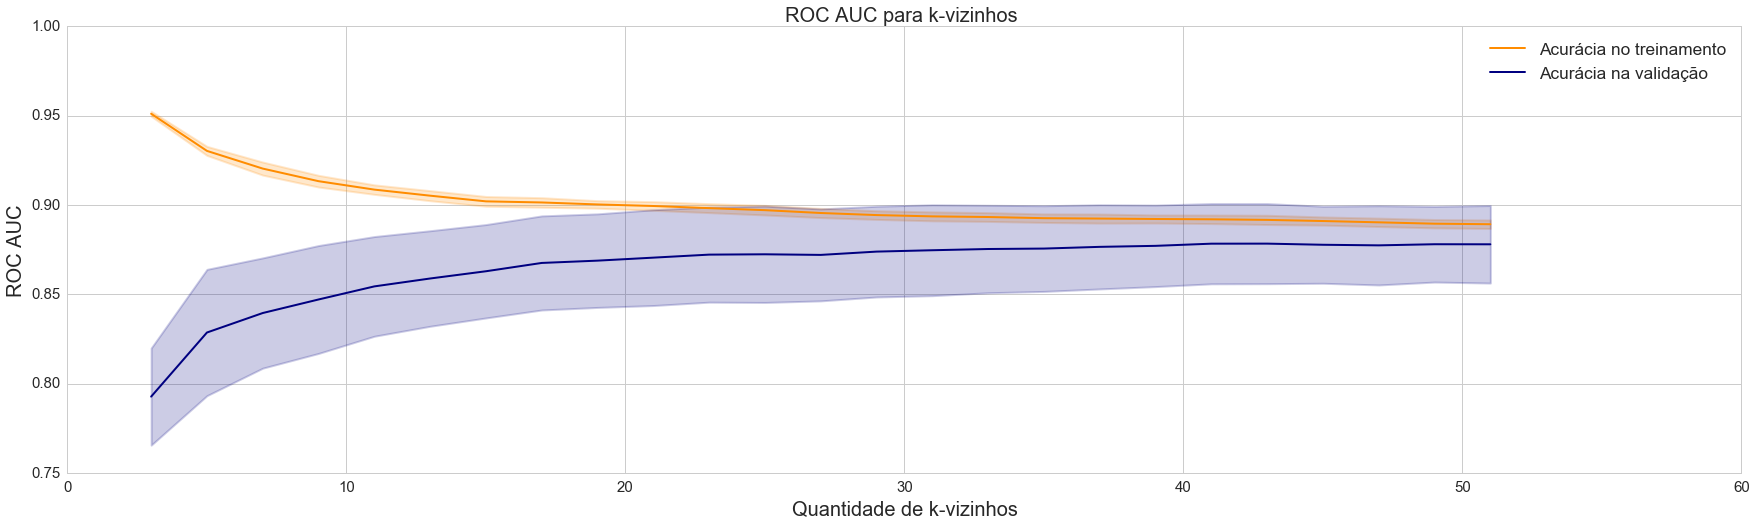

In [167]:
# Busca do melhor hiperparâmetro
validation_graph_roc(model=KNN(),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [168]:
# Busca do melhor parâmetro utilizando gridSearchCV
cross_val_desbal_roc_1 = cross_val_score(KNN(n_neighbors=5),conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_1)
print(np.mean(cross_val_desbal_roc_1))

[ 0.79852092  0.77153832  0.80827389  0.83046765  0.82309006  0.85760015
  0.78833608  0.88701908  0.85912444  0.86168526]
0.828565585432


In [169]:
# Busca do melhor parâmetro utilizando gridSearchCV
cross_val_desbal_roc_1 = cross_val_score(KNN(n_neighbors=7),conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_1)
print(np.mean(cross_val_desbal_roc_1))

[ 0.84484728  0.77726968  0.81836473  0.83345528  0.83110786  0.85772209
  0.80839583  0.88229376  0.86930675  0.87205048]
0.839481374781


In [170]:
# Busca do melhor parâmetro utilizando gridSearchCV
cross_val_desbal_roc_1 = cross_val_score(KNN(n_neighbors=9),conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_1)
print(np.mean(cross_val_desbal_roc_1))

[ 0.84731241  0.79467715  0.8097677   0.84592403  0.84348515  0.87241632
  0.81571246  0.88253765  0.87976343  0.87906225]
0.847065854724


In [171]:
# Busca do melhor parâmetro utilizando gridSearchCV
cross_val_desbal_roc_1 = cross_val_score(KNN(n_neighbors=11),conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_1)
print(np.mean(cross_val_desbal_roc_1))

[ 0.84707191  0.8158344   0.81135297  0.85808792  0.84912505  0.88561673
  0.82626059  0.88217182  0.88869581  0.87973294]
0.85439501487


In [172]:
# Busca do melhor parâmetro utilizando gridSearchCV
cross_val_desbal_roc_1 = cross_val_score(KNN(n_neighbors=21),conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_1)
print(np.mean(cross_val_desbal_roc_1))

[ 0.86919793  0.83162612  0.82205353  0.8707091   0.87317846  0.90207914
  0.85104567  0.88695811  0.90393878  0.89418328]
0.870497014071


In [173]:
# Busca do melhor parâmetro utilizando gridSearchCV
cross_val_desbal_roc_1 = cross_val_score(KNN(n_neighbors=31),conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_1)
print(np.mean(cross_val_desbal_roc_1))

[ 0.87006975  0.83315042  0.83653436  0.87955003  0.86766051  0.90339004
  0.85674654  0.89070788  0.90884702  0.89976221]
0.874641874818


In [175]:
clf_knn = KNN(n_neighbors=21)
clf_knn.fit(conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto1_test_desbalanceado)
print('ROC AUC para o conjunto 1: {:.2f}'.format(roc_auc_score(conjunto1_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 1: 0.73


### Dataset 2

O dataset 2 balanceado possui

#### F1-Score

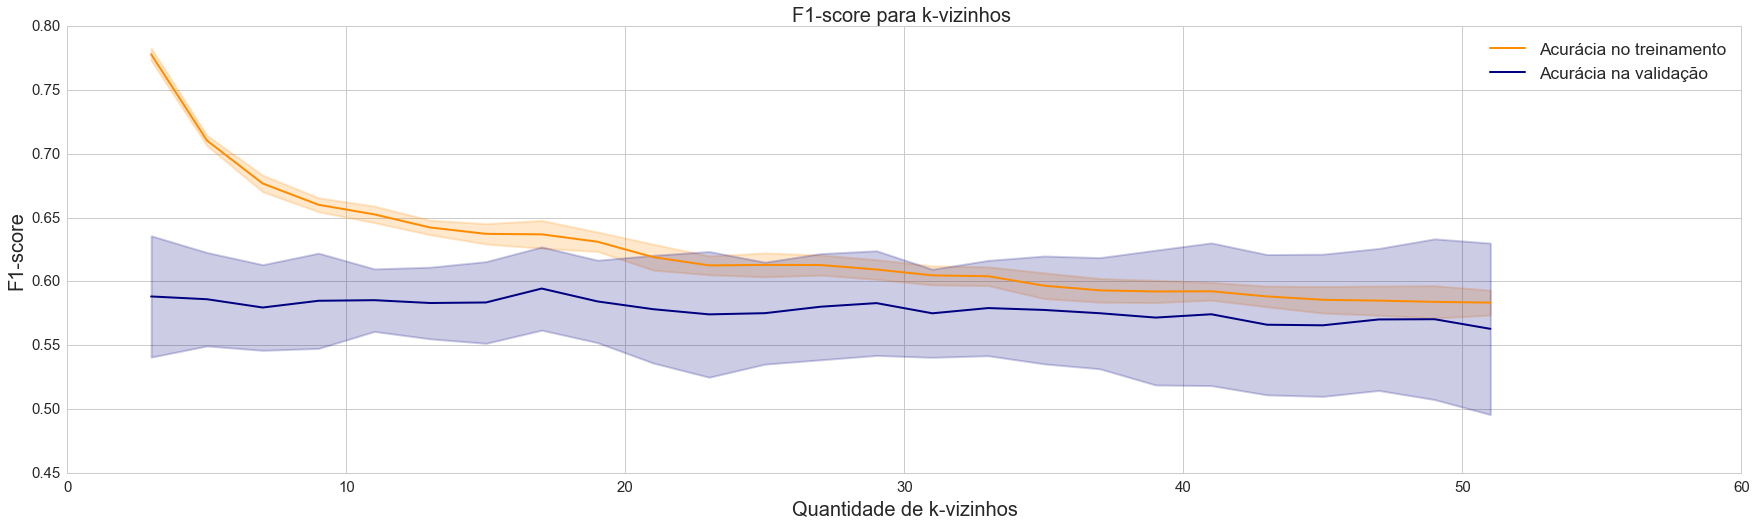

In [176]:
# Busca do melhor hiperparâmetro
validation_graph_f1(model=KNN(),X=conjunto2_train_desbalanceado,y=conjunto2_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

In [34]:
# acurácia no conjunto de teste
cross_val_desbal_f1_2 = cross_val_score(KNN(n_neighbors=3),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_2)
print(np.mean(cross_val_desbal_f1_2))

[0.58333333 0.55474453 0.576      0.58156028 0.62773723 0.63829787
 0.5        0.68055556 0.55882353 0.58156028]
0.5882612609841782


In [35]:
# acurácia no conjunto de teste
cross_val_desbal_f1_2 = cross_val_score(KNN(n_neighbors=3),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_2)
print(np.mean(cross_val_desbal_f1_2))

[0.58333333 0.55474453 0.576      0.58156028 0.62773723 0.63829787
 0.5        0.68055556 0.55882353 0.58156028]
0.5882612609841782


In [36]:
# acurácia no conjunto de teste
cross_val_desbal_f1_2 = cross_val_score(KNN(n_neighbors=3),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_2)
print(np.mean(cross_val_desbal_f1_2))

[0.58333333 0.55474453 0.576      0.58156028 0.62773723 0.63829787
 0.5        0.68055556 0.55882353 0.58156028]
0.5882612609841782


In [37]:
# acurácia no conjunto de teste
cross_val_desbal_f1_2 = cross_val_score(KNN(n_neighbors=3),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_2)
print(np.mean(cross_val_desbal_f1_2))

[0.58333333 0.55474453 0.576      0.58156028 0.62773723 0.63829787
 0.5        0.68055556 0.55882353 0.58156028]
0.5882612609841782


In [38]:
clf_knn = KNN(n_neighbors=21)
clf_knn.fit(conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto2_test_desbalanceado)
print('F1-Score para o conjunto 2: {:.2f}'.format(f1_score(conjunto2_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 2: 0.58


#### ROC AUC

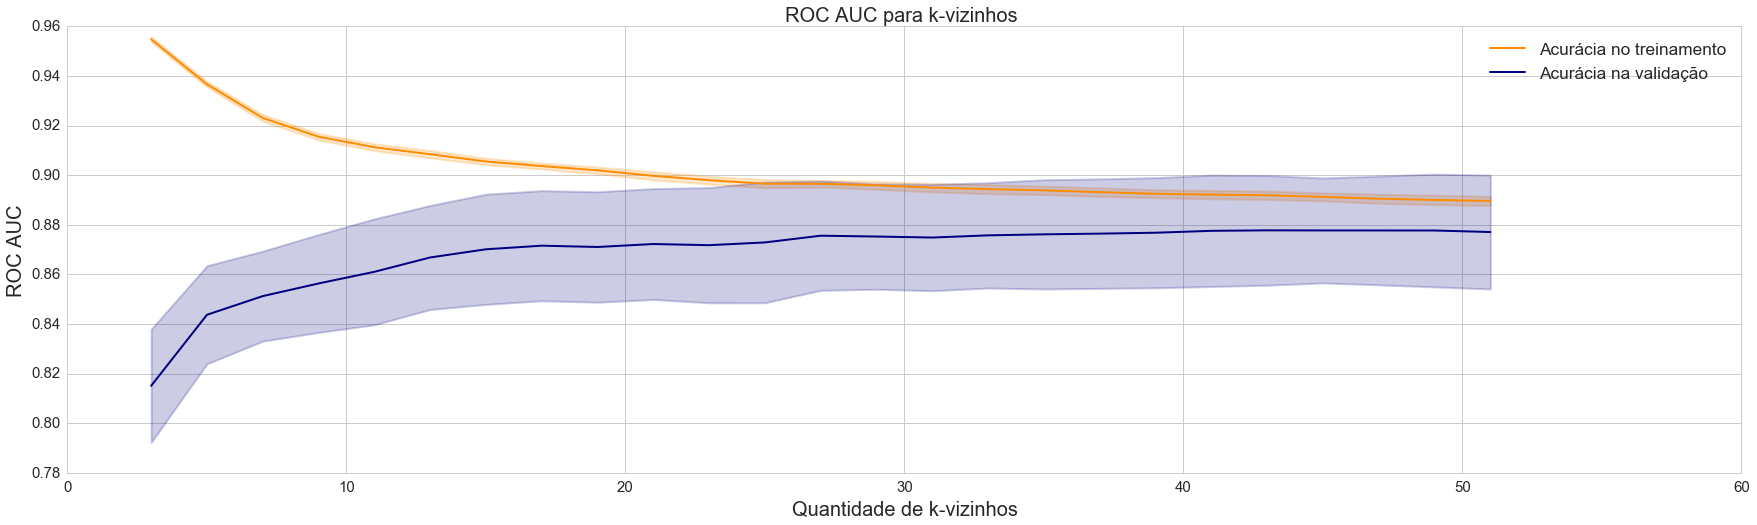

In [184]:
# Busca do melhor hiperparâmetro
validation_graph_roc(model=KNN(),X=conjunto2_train_desbalanceado,y=conjunto2_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [57]:
# n_neighbors_list = [3, 5, 7, 9, 11, 21, 31]
n_neighbors_list = np.arange(19,31,2)
for n_neighbors in n_neighbors_list:
    cross_val_desbal_roc_2 = cross_val_score(KNN(n_neighbors=n_neighbors),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
    print('Cross-val scores ({:d} vizinhos):'.format(n_neighbors))
    print(cross_val_desbal_roc_2)
    print('\n')
    print('Cross-val média ({:d} vizinhos): {:f}\n'.format(n_neighbors, np.mean(cross_val_desbal_roc_2)))

Cross-val scores (19 vizinhos):
[0.86461942 0.86801624 0.86713492 0.89888901 0.8906901  0.88398675
 0.88059502 0.87893922 0.86465121 0.81300075]


Cross-val média (19 vizinhos): 0.871052

Cross-val scores (21 vizinhos):
[0.86401575 0.87429228 0.86382331 0.90228074 0.89445572 0.88430723
 0.88275825 0.87664245 0.86347612 0.81644589]


Cross-val média (21 vizinhos): 0.872250

Cross-val scores (23 vizinhos):
[0.86362205 0.87338425 0.85709326 0.90505822 0.89619165 0.88425382
 0.88318556 0.87156821 0.86742869 0.81604529]


Cross-val média (23 vizinhos): 0.871783

Cross-val scores (25 vizinhos):
[0.8660105  0.87909946 0.85746715 0.90706121 0.89498985 0.89159812
 0.88358616 0.87084713 0.86368978 0.81460314]


Cross-val média (25 vizinhos): 0.872895

Cross-val scores (27 vizinhos):
[0.87173228 0.88363957 0.85682619 0.90991881 0.89621835 0.88903429
 0.88444076 0.87341096 0.86462451 0.82622049]


Cross-val média (27 vizinhos): 0.875607

Cross-val scores (29 vizinhos):
[0.87115486 0.87907275 0.856

In [39]:
# roc auc no conjunto de teste
cross_val_desbal_roc_2 = cross_val_score(KNN(n_neighbors=3),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_2)
print(np.mean(cross_val_desbal_roc_2))

[0.82178478 0.7793772  0.80923512 0.83148168 0.82977246 0.86166008
 0.79262365 0.82736887 0.79686999 0.8005555 ]
0.8150729334108314


In [40]:
# roc auc no conjunto de teste
cross_val_desbal_roc_2 = cross_val_score(KNN(n_neighbors=5),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_2)
print(np.mean(cross_val_desbal_roc_2))

[0.82650919 0.81954385 0.83602179 0.87717658 0.86740199 0.87044653
 0.83869245 0.84654417 0.8299327  0.82485846]
0.8437127710013709


In [41]:
# roc auc no conjunto de teste
cross_val_desbal_roc_2 = cross_val_score(KNN(n_neighbors=7),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_2)
print(np.mean(cross_val_desbal_roc_2))

[0.84776903 0.83086743 0.84609016 0.88163658 0.86566606 0.86996582
 0.8401346  0.86230104 0.85014956 0.81788805]
0.8512468313135892


In [42]:
# acurácia no conjunto de teste
cross_val_desbal_roc_2 = cross_val_score(KNN(n_neighbors=9),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_2)
print(np.mean(cross_val_desbal_roc_2))

[0.86459318 0.84659759 0.8531941  0.88401346 0.87058007 0.87044653
 0.84670441 0.87381156 0.84098921 0.81249332]
0.8563423429031097


In [43]:
# acurácia no conjunto de teste
cross_val_desbal_roc_2 = cross_val_score(KNN(n_neighbors=11),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_2)
print(np.mean(cross_val_desbal_roc_2))

[0.8687664  0.84809315 0.85372823 0.88681765 0.88310544 0.87469287
 0.86227433 0.87210234 0.85217925 0.80867429]
0.8610433961084423


In [44]:
# acurácia no conjunto de teste
cross_val_desbal_roc_2 = cross_val_score(KNN(n_neighbors=21),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_2)
print(np.mean(cross_val_desbal_roc_2))

[0.86401575 0.87429228 0.86382331 0.90228074 0.89445572 0.88430723
 0.88275825 0.87664245 0.86347612 0.81644589]
0.8722497747817843


In [45]:
# acurácia no conjunto de teste
cross_val_desbal_roc_2 = cross_val_score(KNN(n_neighbors=31),conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_2)
print(np.mean(cross_val_desbal_roc_2))

[0.87028871 0.88107574 0.85415554 0.90981199 0.89875547 0.89020938
 0.88305202 0.86697468 0.86160667 0.83268347]
0.874861367919225


#### Performance

In [46]:
clf_knn = KNN(n_neighbors=5)
clf_knn.fit(conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict_proba(conjunto2_test_desbalanceado)
print('ROC AUC para o conjunto 2: {:.2f}'.format(roc_auc_score(conjunto2_test_target_desbalanceado.earnings,prediction_desbalanceado[:,1])))

ROC AUC para o conjunto 2: 0.83


In [61]:
path_arquivos = 'Classificadores/kNN/'

clf_knn = KNN(n_neighbors=27)
clf_knn.fit(conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings)
joblib.dump(clf_knn, 
            path_arquivos+'knn-final-abordagem-2-desbalanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')

path_arquivos = 'Classificadores/kNN/'

clf_final_desbalanceado = joblib.load(path_arquivos+'knn-final-abordagem-2-desbalanceado-dataset-'+str(int(fracao_dataset*100))+'pct.pkl')

exibir_resultados_finais(clf=clf_final_desbalanceado, 
                         test_data=conjunto2_test_desbalanceado, 
                         test_target=conjunto2_test_target_desbalanceado.earnings, 
                         id_abordagem=2, 
                         str_balanceamento='desbalanceado', 
                         fracao_dataset=0.1,
                         path_arquivos=path_arquivos,
                         tipo_classificador='knn',
                         salvar_resultados=True)

['Classificadores/kNN/knn-abordagem-2-desbalanceado-dataset-10pct.pkl']

### Dataset 3

O dataset 3 balanceado possui

#### F1-Score

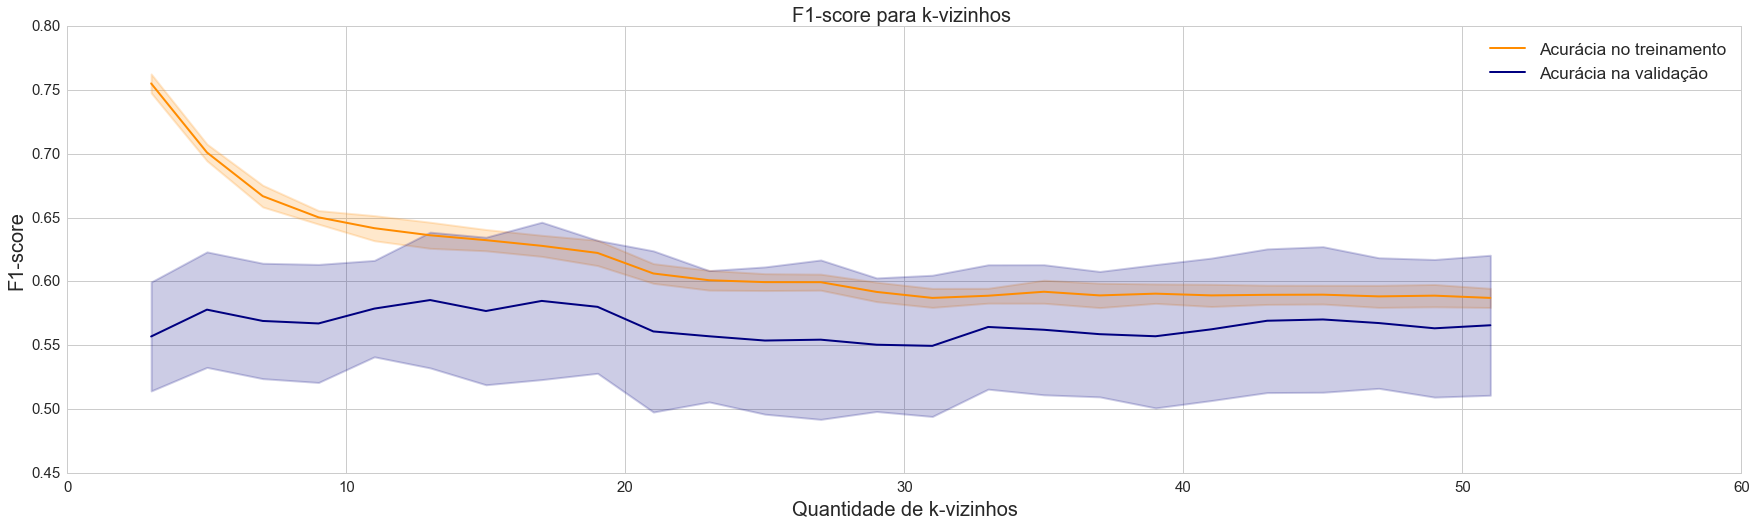

In [195]:
# Busca do melhor hiperparâmetro
validation_graph_f1(model=KNN(),X=conjunto3_train_desbalanceado,y=conjunto3_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

In [196]:
# acurácia no conjunto de teste
cross_val_desbal_f1_3 = cross_val_score(KNN(n_neighbors=3),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_3)
print(np.mean(cross_val_desbal_f1_3))

[ 0.61290323  0.57575758  0.49612403  0.5648855   0.5625      0.47328244
  0.55813953  0.61538462  0.53846154  0.57142857]
0.556886703166


In [197]:
# acurácia no conjunto de teste
cross_val_desbal_f1_3 = cross_val_score(KNN(n_neighbors=5),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_3)
print(np.mean(cross_val_desbal_f1_3))

[ 0.64566929  0.64122137  0.52380952  0.53125     0.58536585  0.515625
  0.58646617  0.625       0.55555556  0.56923077]
0.577919353305


In [198]:
# acurácia no conjunto de teste
cross_val_desbal_f1_3 = cross_val_score(KNN(n_neighbors=7),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_3)
print(np.mean(cross_val_desbal_f1_3))

[ 0.62184874  0.60465116  0.546875    0.56910569  0.59677419  0.53968254
  0.55384615  0.63333333  0.47058824  0.55384615]
0.569055120289


In [199]:
# acurácia no conjunto de teste
cross_val_desbal_f1_3 = cross_val_score(KNN(n_neighbors=9),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_3)
print(np.mean(cross_val_desbal_f1_3))

[ 0.61538462  0.62121212  0.53333333  0.57627119  0.61157025  0.5203252
  0.5625      0.60344828  0.47058824  0.55639098]
0.567102419616


In [200]:
# acurácia no conjunto de teste
cross_val_desbal_f1_3 = cross_val_score(KNN(n_neighbors=21),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_3)
print(np.mean(cross_val_desbal_f1_3))

[ 0.62608696  0.62608696  0.53448276  0.54385965  0.60176991  0.41441441
  0.56198347  0.624       0.50420168  0.57142857]
0.560831436988


In [201]:
# acurácia no conjunto de teste
cross_val_desbal_f1_3 = cross_val_score(KNN(n_neighbors=31),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_3)
print(np.mean(cross_val_desbal_f1_3))

[ 0.59459459  0.61538462  0.49090909  0.54545455  0.56637168  0.44036697
  0.54237288  0.61157025  0.4957265   0.59259259]
0.549534371784


#### Performance

In [228]:
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('F1-Score para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 3: 0.60


In [229]:
clf_knn = KNN(n_neighbors=5)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('F1-Score para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 3: 0.61


In [230]:
clf_knn = KNN(n_neighbors=7)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('F1-Score para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 3: 0.60


In [231]:
clf_knn = KNN(n_neighbors=9)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('F1-Score para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 3: 0.58


In [232]:
clf_knn = KNN(n_neighbors=11)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('F1-Score para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 3: 0.58


In [233]:
clf_knn = KNN(n_neighbors=13)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('F1-Score para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 3: 0.60


In [234]:
clf_knn = KNN(n_neighbors=21)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('F1-Score para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 3: 0.60


In [235]:
clf_knn = KNN(n_neighbors=31)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('F1-Score para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 3: 0.57


#### ROC AUC

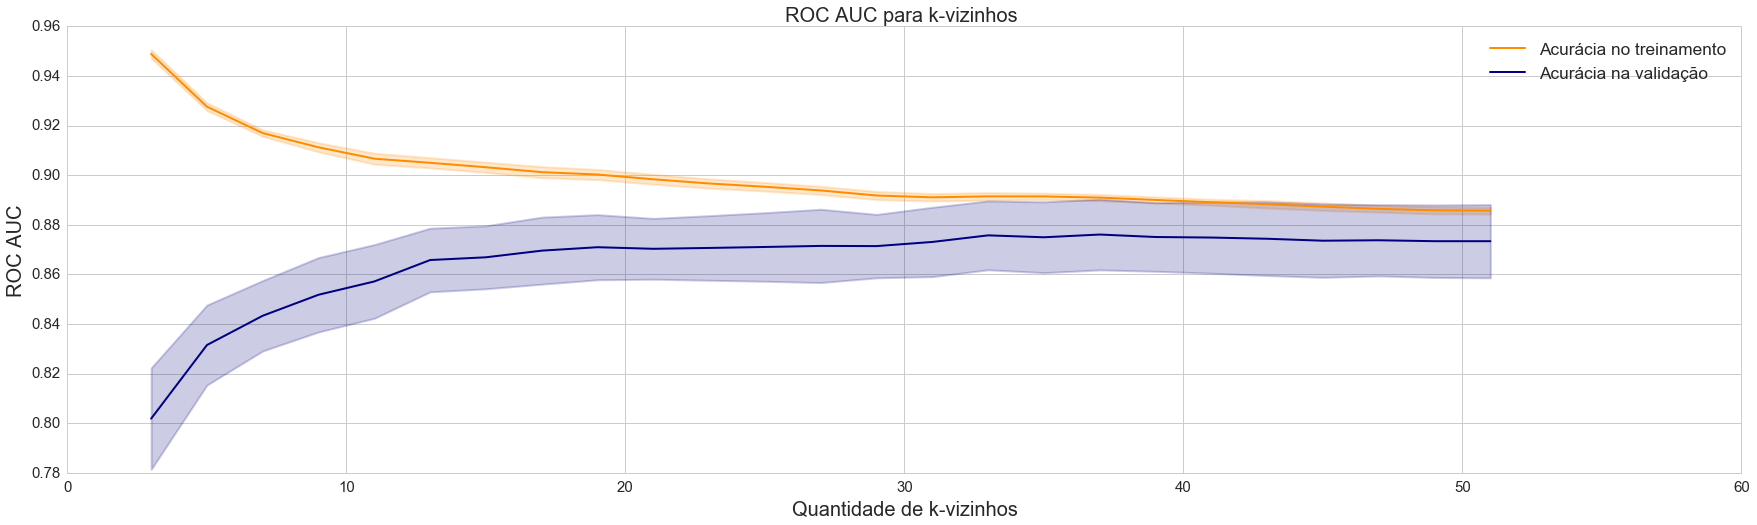

In [202]:
# Busca do melhor hiperparâmetro
validation_graph_roc(model=KNN(),X=conjunto3_train_desbalanceado,y=conjunto3_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [204]:
# acurácia no conjunto de teste
cross_val_desbal_roc_3 = cross_val_score(KNN(n_neighbors=3),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_3)
print(np.mean(cross_val_desbal_roc_3))

[ 0.82001564  0.81607248  0.78927432  0.8161882   0.78748006  0.79694976
  0.78528708  0.84463052  0.77408958  0.78847687]
0.801846451389


In [206]:
# acurácia no conjunto de teste
cross_val_desbal_roc_3 = cross_val_score(KNN(n_neighbors=5),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_3)
print(np.mean(cross_val_desbal_roc_3))

[ 0.83934042  0.86355341  0.82532562  0.82549176  0.83775253  0.82250133
  0.82961191  0.85087719  0.80568846  0.81502525]
0.831516788416


In [207]:
# acurácia no conjunto de teste
cross_val_desbal_roc_3 = cross_val_score(KNN(n_neighbors=7),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_3)
print(np.mean(cross_val_desbal_roc_3))

[ 0.84074171  0.86091377  0.84303562  0.84167331  0.83825093  0.82768474
  0.86207469  0.86582935  0.82854864  0.82459463]
0.843334739726


In [208]:
# acurácia no conjunto de teste
cross_val_desbal_roc_3 = cross_val_score(KNN(n_neighbors=9),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_3)
print(np.mean(cross_val_desbal_roc_3))

[ 0.84670534  0.86906081  0.84579346  0.85645933  0.87058081  0.83346624
  0.86775651  0.86337055  0.83658958  0.82818315]
0.851796577529


In [209]:
# acurácia no conjunto de teste
cross_val_desbal_roc_3 = cross_val_score(KNN(n_neighbors=11),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_3)
print(np.mean(cross_val_desbal_roc_3))

[ 0.84738969  0.87906537  0.84974747  0.86104466  0.87101276  0.83127326
  0.87539872  0.86586257  0.84828549  0.84250399]
0.857158398173


In [210]:
# acurácia no conjunto de teste
cross_val_desbal_roc_3 = cross_val_score(KNN(n_neighbors=21),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_3)
print(np.mean(cross_val_desbal_roc_3))

[ 0.88776641  0.884475    0.85735646  0.87858852  0.87151116  0.85270468
  0.8807815   0.87174375  0.85240564  0.8658958 ]
0.870322891967


In [211]:
# acurácia no conjunto de teste
cross_val_desbal_roc_3 = cross_val_score(KNN(n_neighbors=31),conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_3)
print(np.mean(cross_val_desbal_roc_3))

[ 0.89578309  0.88144431  0.86742424  0.87755848  0.87513291  0.85526316
  0.88330675  0.87367092  0.84356725  0.87772461]
0.873087572548


#### Performance

In [221]:
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 3: 0.75


In [222]:
clf_knn = KNN(n_neighbors=5)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 3: 0.76


In [223]:
clf_knn = KNN(n_neighbors=7)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 3: 0.75


In [224]:
clf_knn = KNN(n_neighbors=9)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 3: 0.73


In [225]:
clf_knn = KNN(n_neighbors=19)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 3: 0.74


In [226]:
clf_knn = KNN(n_neighbors=21)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 3: 0.74


In [227]:
clf_knn = KNN(n_neighbors=31)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 3: 0.72


In [217]:
clf_knn = KNN(n_neighbors=33)
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto3_test_desbalanceado)
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 3: 0.72


### Dataset 4

O dataset 4 balanceado possui

#### F1-Score

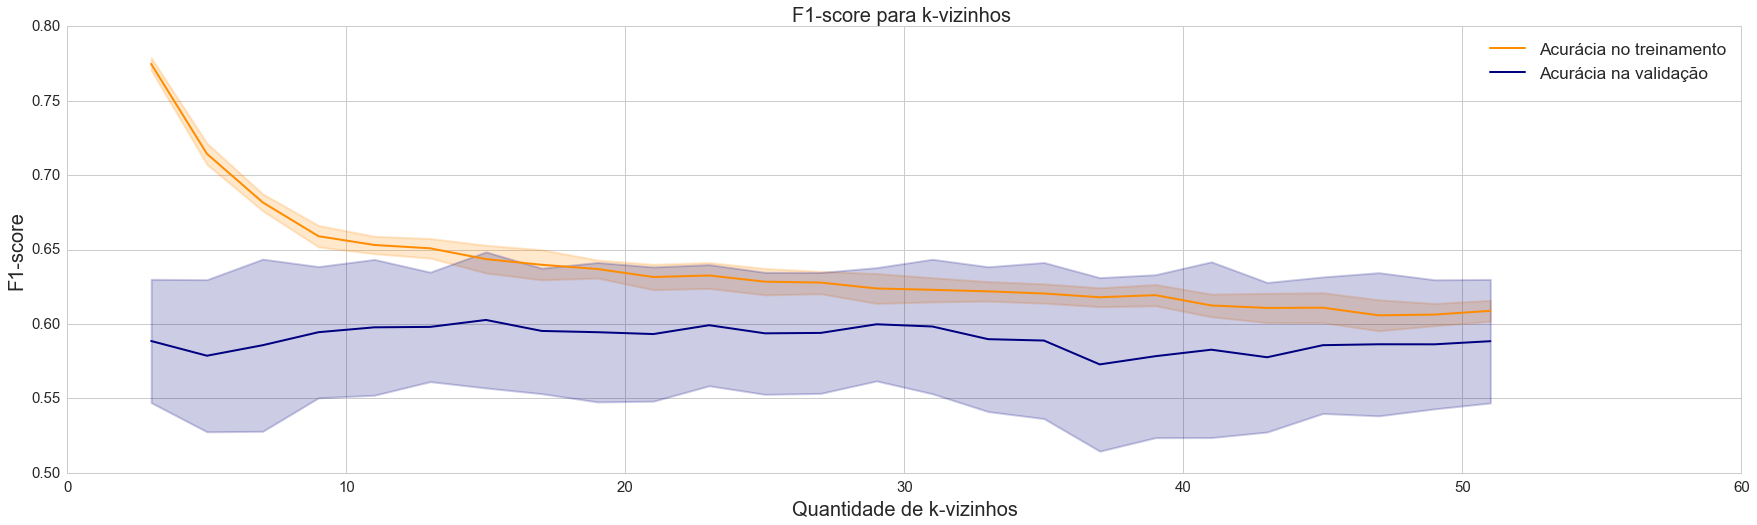

In [236]:
# Busca do melhor hiperparâmetro
validation_graph_f1(model=KNN(),X=conjunto4_train_desbalanceado,y=conjunto4_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

In [266]:
# acurácia no conjunto de teste
cross_val_desbal_f1_4 = cross_val_score(KNN(n_neighbors=3),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)
print(np.mean(cross_val_desbal_f1_4))

[ 0.55        0.5         0.61946903  0.56637168  0.62015504  0.58536585
  0.6557377   0.61788618  0.58536585  0.58536585]
0.588571719148


In [267]:
# acurácia no conjunto de teste
cross_val_desbal_f1_4 = cross_val_score(KNN(n_neighbors=5),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)
print(np.mean(cross_val_desbal_f1_4))

[ 0.544       0.49557522  0.51428571  0.56880734  0.63565891  0.58823529
  0.62068966  0.66101695  0.5483871   0.61016949]
0.578682567645


In [268]:
# acurácia no conjunto de teste
cross_val_desbal_f1_4 = cross_val_score(KNN(n_neighbors=7),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)
print(np.mean(cross_val_desbal_f1_4))

[ 0.52991453  0.49541284  0.50485437  0.58490566  0.66666667  0.61538462
  0.61016949  0.67226891  0.59677419  0.58119658]
0.585754785915


In [269]:
# acurácia no conjunto de teste
cross_val_desbal_f1_4 = cross_val_score(KNN(n_neighbors=9),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)
print(np.mean(cross_val_desbal_f1_4))

[ 0.55        0.53703704  0.56880734  0.5631068   0.65116279  0.59322034
  0.59130435  0.68965517  0.609375    0.59130435]
0.594497317035


In [270]:
# acurácia no conjunto de teste
cross_val_desbal_f1_4 = cross_val_score(KNN(n_neighbors=11),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)
print(np.mean(cross_val_desbal_f1_4))

[ 0.53913043  0.51851852  0.58715596  0.61682243  0.66666667  0.59130435
  0.58119658  0.66666667  0.624       0.5862069 ]
0.597766850542


In [271]:
# acurácia no conjunto de teste
cross_val_desbal_f1_4 = cross_val_score(KNN(n_neighbors=21),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)
print(np.mean(cross_val_desbal_f1_4))

[ 0.54700855  0.55045872  0.59615385  0.59047619  0.66666667  0.61538462
  0.52336449  0.66666667  0.59677419  0.57943925]
0.593239317982


In [272]:
# acurácia no conjunto de teste
cross_val_desbal_f1_4 = cross_val_score(KNN(n_neighbors=31),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)
print(np.mean(cross_val_desbal_f1_4))

[ 0.57627119  0.54545455  0.62135922  0.66037736  0.66115702  0.54054054
  0.54716981  0.64912281  0.6         0.58181818]
0.598327067918


#### Performance

In [273]:
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('F1-Score para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 4: 0.55


In [274]:
clf_knn = KNN(n_neighbors=5)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('F1-Score para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 4: 0.58


In [275]:
clf_knn = KNN(n_neighbors=7)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('F1-Score para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 4: 0.57


In [276]:
clf_knn = KNN(n_neighbors=9)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('F1-Score para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 4: 0.57


In [277]:
clf_knn = KNN(n_neighbors=11)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('F1-Score para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 4: 0.55


In [278]:
clf_knn = KNN(n_neighbors=15)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('F1-Score para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 4: 0.54


In [279]:
clf_knn = KNN(n_neighbors=21)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('F1-Score para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 4: 0.56


In [280]:
clf_knn = KNN(n_neighbors=31)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('F1-Score para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

F1-Score para o conjunto 4: 0.58


#### ROC AUC

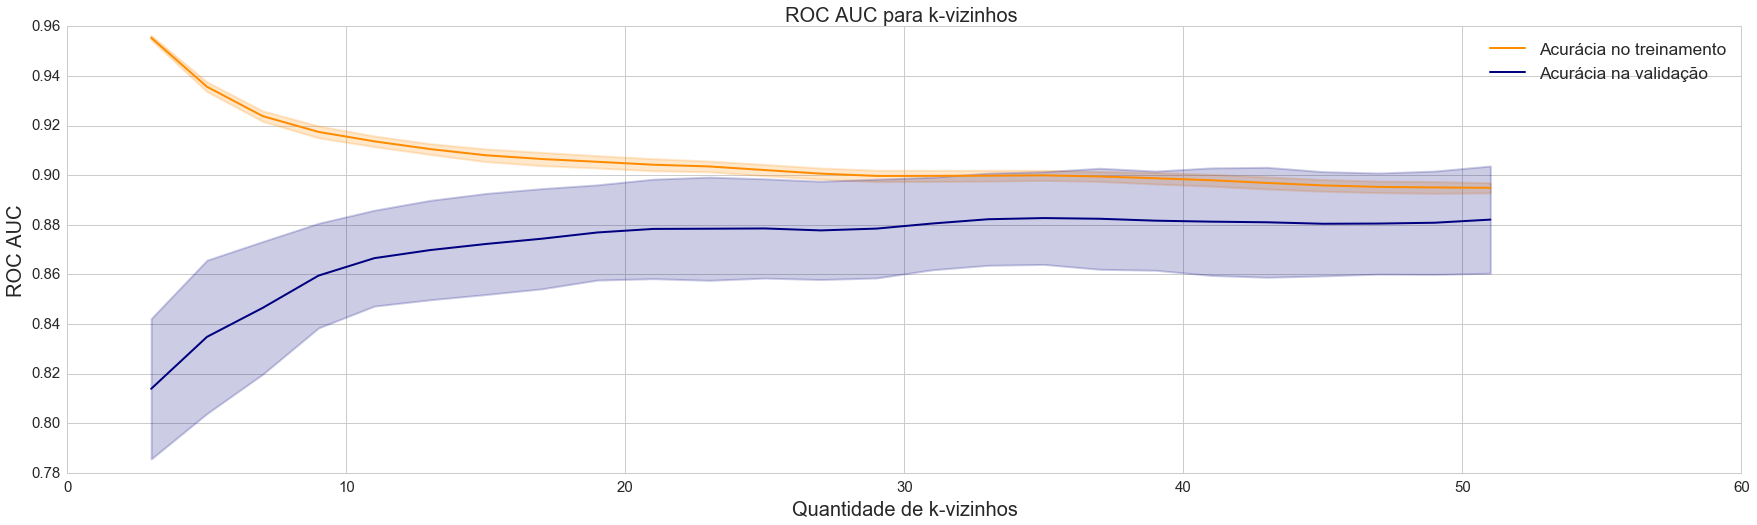

In [245]:
# Busca do melhor hiperparâmetro
validation_graph_roc(model=KNN(),X=conjunto4_train_desbalanceado,y=conjunto4_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [246]:
# acurácia no conjunto de teste
cross_val_desbal_roc_4 = cross_val_score(KNN(n_neighbors=3),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.76939623  0.77596054  0.784305    0.83810672  0.85438649  0.80245704
  0.81519445  0.84549292  0.83049371  0.82284568]
0.81386387868


In [247]:
# acurácia no conjunto de teste
cross_val_desbal_roc_4 = cross_val_score(KNN(n_neighbors=5),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.80755823  0.77811156  0.79824952  0.85898402  0.87748719  0.82902472
  0.83852125  0.87454778  0.8355293   0.85003029]
0.834804386228


In [248]:
# acurácia no conjunto de teste
cross_val_desbal_roc_4 = cross_val_score(KNN(n_neighbors=7),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.82246699  0.80325619  0.81052514  0.86309165  0.88434579  0.83622249
  0.84635966  0.88223545  0.85381645  0.8628275 ]
0.846514733057


In [249]:
# acurácia no conjunto de teste
cross_val_desbal_roc_4 = cross_val_score(KNN(n_neighbors=9),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.83607773  0.82402463  0.84201157  0.87910763  0.88057733  0.84696262
  0.85902171  0.89380464  0.86108587  0.87252007]
0.85951937886


In [250]:
# acurácia no conjunto de teste
cross_val_desbal_roc_4 = cross_val_score(KNN(n_neighbors=11),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.84445928  0.83329625  0.85669782  0.88675761  0.89583961  0.86312933
  0.86203648  0.88999849  0.85669393  0.87657126]
0.86654800592


In [251]:
# acurácia no conjunto de teste
cross_val_desbal_roc_4 = cross_val_score(KNN(n_neighbors=15),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.85525145  0.83348168  0.87360926  0.89972113  0.8993066   0.86211185
  0.8698372   0.89727163  0.86048008  0.87161139]
0.872268227325


In [252]:
# acurácia no conjunto de teste
cross_val_desbal_roc_4 = cross_val_score(KNN(n_neighbors=21),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.85458389  0.84865005  0.89697374  0.90820018  0.89331474  0.86049141
  0.8740202   0.90341423  0.86615932  0.87759352]
0.878340128366


In [253]:
# acurácia no conjunto de teste
cross_val_desbal_roc_4 = cross_val_score(KNN(n_neighbors=25),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.85673491  0.84998517  0.89786382  0.91117727  0.893164    0.86064215
  0.86968646  0.90190684  0.86797668  0.87611692]
0.878525420941


In [254]:
# acurácia no conjunto de teste
cross_val_desbal_roc_4 = cross_val_score(KNN(n_neighbors=31),conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.85584483  0.85832962  0.90157247  0.90997136  0.89599035  0.86064215
  0.86772686  0.89678173  0.87816144  0.88020597]
0.880522678159


#### Performance

In [255]:
clf_knn = KNN(n_neighbors=3)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 4: 0.72


In [256]:
clf_knn = KNN(n_neighbors=5)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 4: 0.73


In [257]:
clf_knn = KNN(n_neighbors=7)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 4: 0.72


In [258]:
clf_knn = KNN(n_neighbors=9)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 4: 0.72


In [259]:
clf_knn = KNN(n_neighbors=11)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 4: 0.71


In [260]:
clf_knn = KNN(n_neighbors=15)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 4: 0.70


In [261]:
clf_knn = KNN(n_neighbors=21)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 4: 0.71


In [262]:
clf_knn = KNN(n_neighbors=31)
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_desbalanceado = clf_knn.predict(conjunto4_test_desbalanceado)
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_desbalanceado)))

ROC AUC para o conjunto 4: 0.72


### Avaliação dos modelos para cada cenário

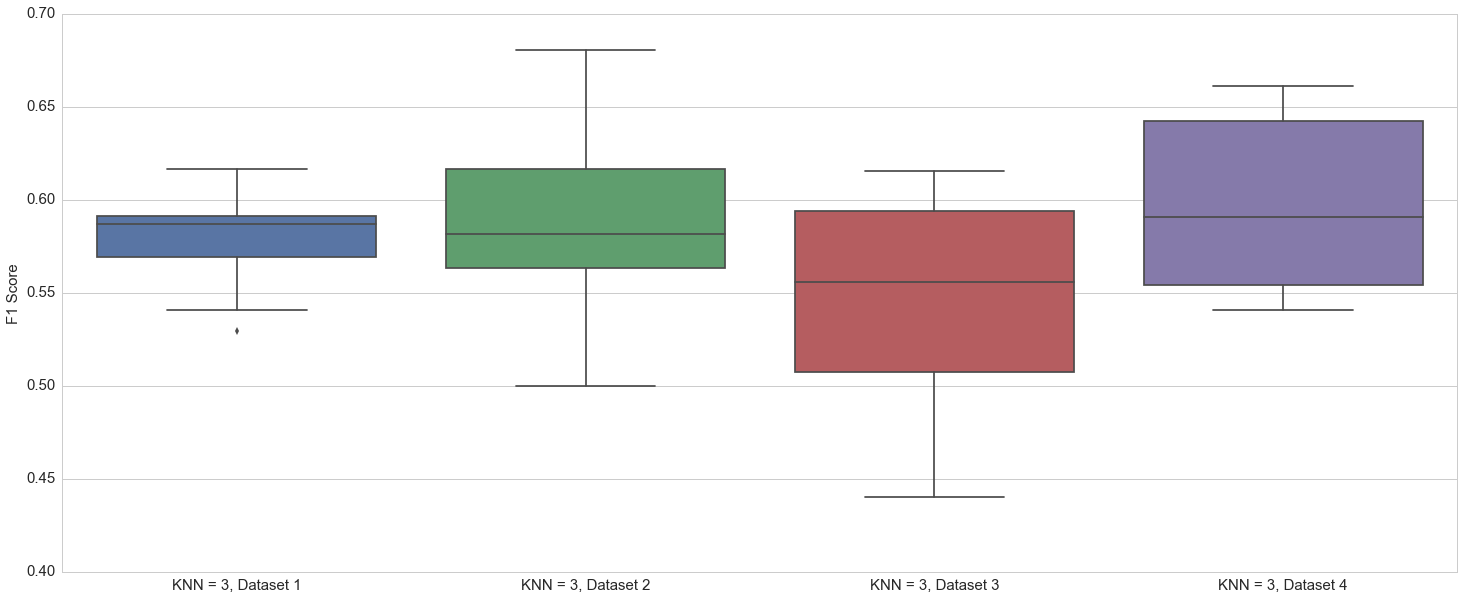

In [281]:
modelos_desbalanceados = [cross_val_desbal_f1_1, cross_val_desbal_f1_2, cross_val_desbal_f1_3, cross_val_desbal_f1_4]
labels = ['KNN = 3, Dataset 1', 'KNN = 3, Dataset 2', 'KNN = 3, Dataset 3', 'KNN = 3, Dataset 4']
plt.figure(figsize=(25,10))
sns.boxplot(data=modelos_desbalanceados)
plt.xticks(list(range(0,4)),labels,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('F1 Score',fontsize=15)
plt.show()